                                time   magnitude   longitude    latitude  \
count                            492  492.000000  492.000000  492.000000   
mean   2023-08-15 07:29:14.622050560    4.800772   24.556356   -0.017742   
min       2023-08-01 02:20:46.066000    4.500000 -179.931400  -62.177500   
25%    2023-08-07 00:07:31.091749888    4.500000  -75.063325  -21.994050   
50%    2023-08-15 00:00:27.827500032    4.700000   70.097650   -1.305250   
75%    2023-08-22 19:23:30.149750016    4.900000  129.117575   21.743200   
max       2023-08-31 21:43:25.888000    7.100000  179.899300   83.475200   
std                              NaN    0.375329  119.982102   29.960864   

            depth  
count  492.000000  
mean    73.788683  
min      2.963000  
25%     10.000000  
50%     25.064500  
75%     71.293500  
max    646.537000  
std    125.042290  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column     Non-Null Count 

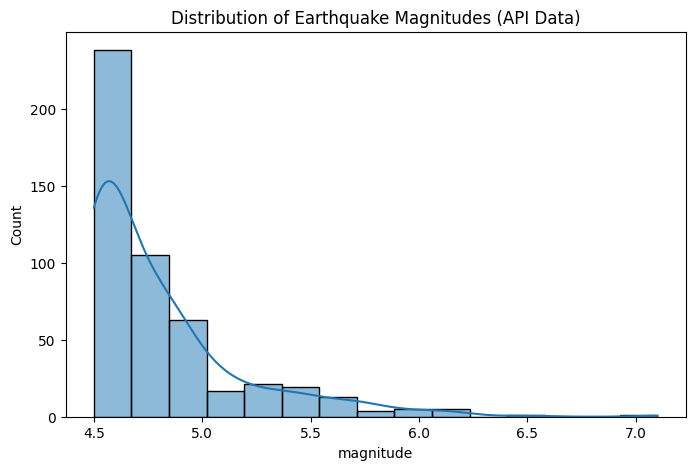

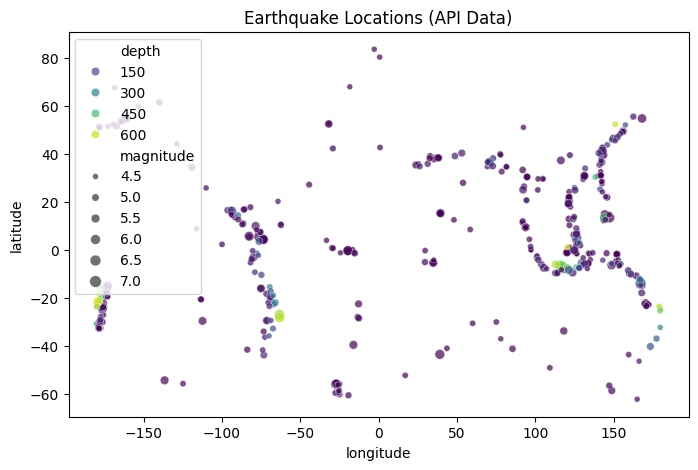

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch earthquake data from USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": "2023-08-01",
    "endtime": "2023-09-01",
    "minmagnitude": 4.5
}
response = requests.get(url, params=params).json()

records = []
for feat in response['features']:
    props = feat['properties']
    geom = feat['geometry']
    records.append({
        "time": pd.to_datetime(props['time'], unit='ms'),
        "place": props['place'],
        "magnitude": props['mag'],
        "longitude": geom['coordinates'][0],
        "latitude": geom['coordinates'][1],
        "depth": geom['coordinates'][2]
    })
df_api = pd.DataFrame(records)

# --- EDA ---
print(df_api.describe())
print(df_api.info())

# --- Visualizations ---
plt.figure(figsize=(8,5))
sns.histplot(df_api['magnitude'], bins=15, kde=True)
plt.title("Distribution of Earthquake Magnitudes (API Data)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_api, x="longitude", y="latitude", size="magnitude", hue="depth", alpha=0.7, palette="viridis")
plt.title("Earthquake Locations (API Data)")
plt.show()





📊 Descriptive Statistics:
                                Date      Latitude     Longitude  \
count                        3445751  3.445751e+06  3.445751e+06   
mean   1970-01-01 00:20:47.123563705  3.746483e+01 -1.012876e+02   
min    1970-01-01 00:10:31.153353990 -8.442200e+01 -1.799997e+02   
25%    1970-01-01 00:17:04.401029543  3.406400e+01 -1.464274e+02   
50%    1970-01-01 00:21:22.338053750  3.793567e+01 -1.189538e+02   
75%    1970-01-01 00:25:08.700590235  4.784800e+01 -1.159277e+02   
max    1970-01-01 00:28:10.628937884  8.738600e+01  1.800000e+02   
std                              NaN  2.041577e+01  7.697416e+01   

              Depth     Magnitude       Year  
count  3.445751e+06  3.445751e+06  3445751.0  
mean   2.285387e+01  1.774076e+00     1970.0  
min   -1.000000e+01 -9.990000e+00     1970.0  
25%    3.120000e+00  9.100000e-01     1970.0  
50%    7.700000e+00  1.460000e+00     1970.0  
75%    1.612000e+01  2.300000e+00     1970.0  
max    7.358000e+02  9.100000e+

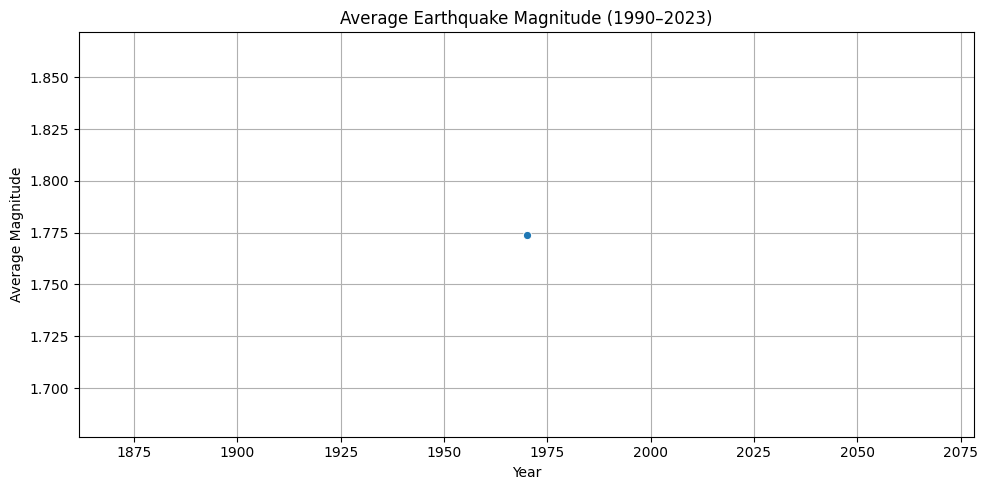

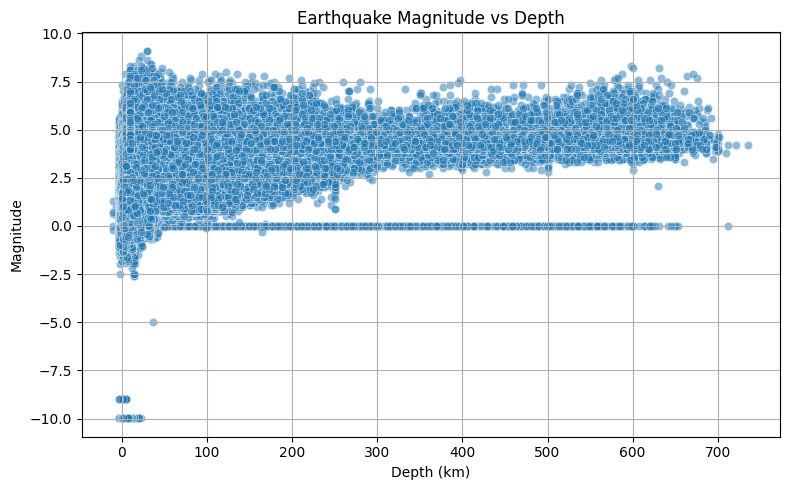

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load and Prepare Dataset ---
file_path = r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\Eartquakes-1990-2023.csv"
df = pd.read_csv(file_path)

# Select and rename relevant columns
df = df[['time', 'latitude', 'longitude', 'depth', 'magnitudo', 'place']].copy()
df.columns = ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location']

# Parse date and drop missing values
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(inplace=True)

# Extract year for time-based analysis
df['Year'] = df['Date'].dt.year

# --- Descriptive Overview ---
print("\n📊 Descriptive Statistics:")
print(df.describe())

print("\n🧼 Missing Values:")
print(df.isnull().sum())

# --- Visualization 1: Average Magnitude Over Time ---
plt.figure(figsize=(10, 5))
avg_mag = df.groupby('Year')['Magnitude'].mean().reset_index()
sns.lineplot(data=avg_mag, x='Year', y='Magnitude', marker='o')
plt.title("Average Earthquake Magnitude (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Visualization 2: Magnitude vs Depth ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Depth', y='Magnitude', alpha=0.5)
plt.title("Earthquake Magnitude vs Depth")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()


Setting CRS to EPSG:4326 (WGS84)
✅ Soil data loaded successfully!
Columns: ['SNUM', 'FAOSOIL', 'DOMSOI', 'PHASE1', 'PHASE2', 'MISCLU1', 'MISCLU2', 'PERMAFROST', 'CNTCODE', 'CNTNAME', 'SQKM', 'COUNTRY', 'geometry']
Number of soil polygons: 34112
CRS: EPSG:4326

First few rows:
   SNUM FAOSOIL DOMSOI PHASE1 PHASE2 MISCLU1 MISCLU2 PERMAFROST  CNTCODE  \
0  3479  Rx1-2c     Rx   None   None       0       0          1       85   
1  6998      GL     GL   None   None       0       0          1       85   
2  6998      GL     GL   None   None       0       0          1       85   
3  6998      GL     GL   None   None       0       0          1       85   
4  3479  Rx1-2c     Rx   None   None       0       0          1       85   

  CNTNAME    SQKM    COUNTRY  \
0      GL  4194.0  GREENLAND   
1      GL  8798.0  GREENLAND   
2      GL   659.0  GREENLAND   
3      GL    69.0  GREENLAND   
4      GL   204.0  GREENLAND   

                                            geometry  
0  POLYGON ((-34.6

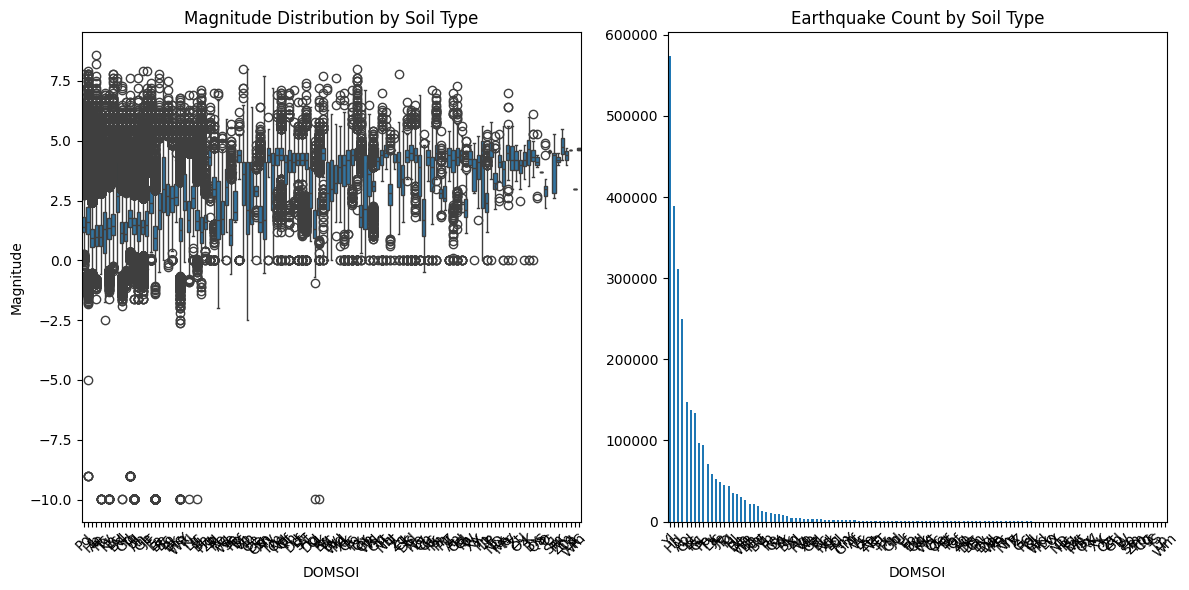

C:\Users\archi\AppData\Local\Temp\ipykernel_16532\1979991764.py:97: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


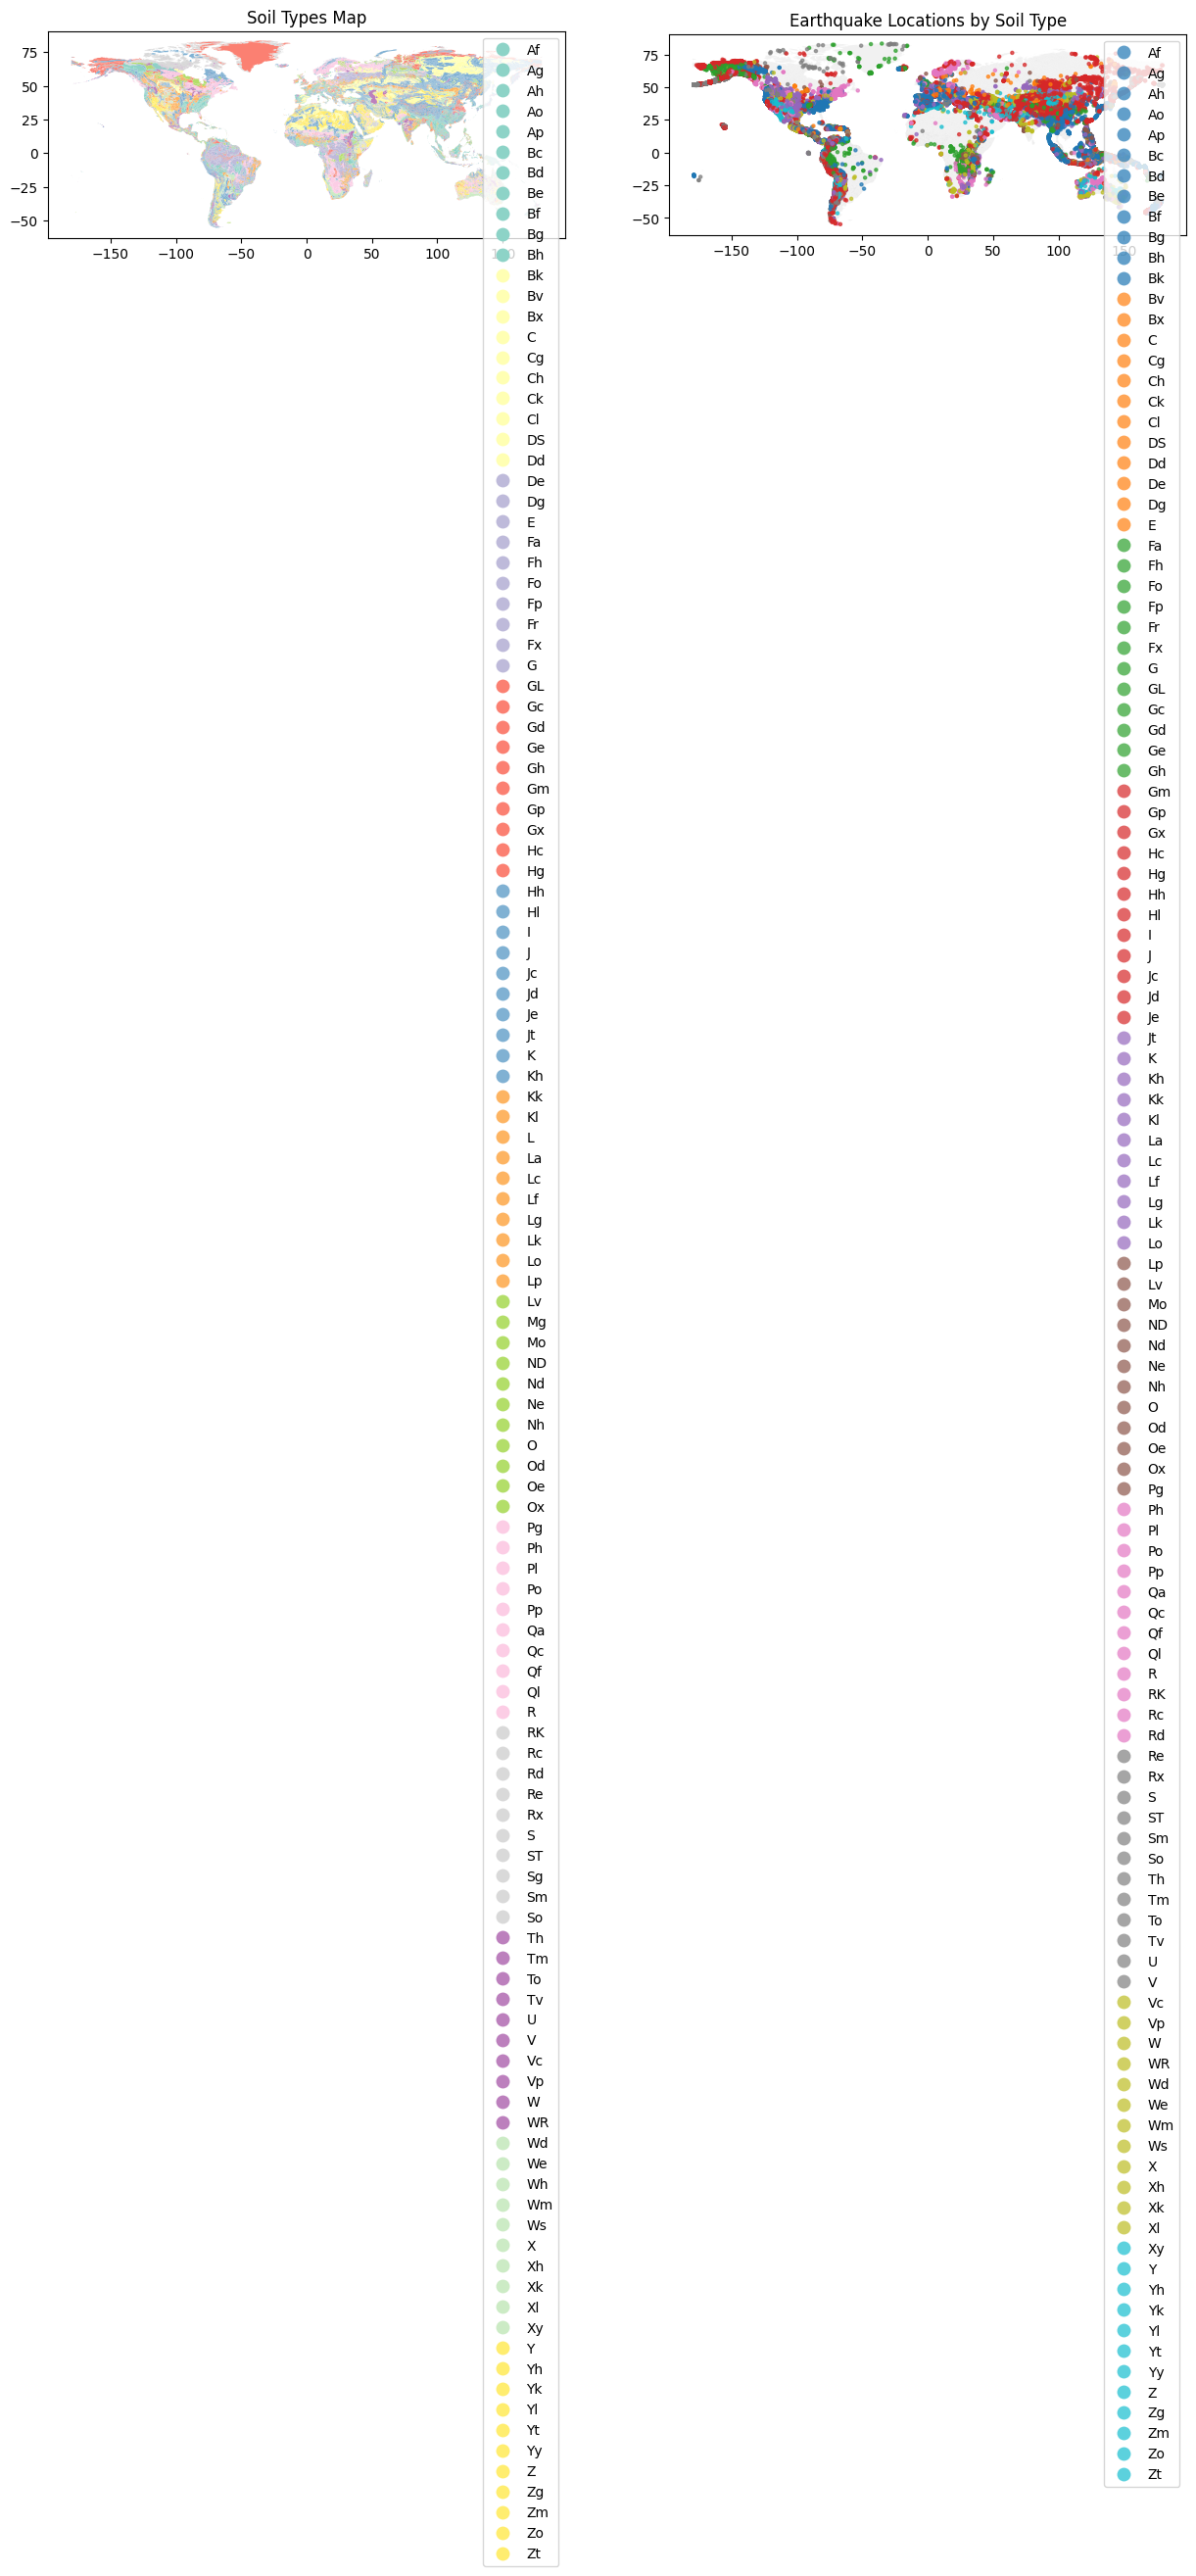


📊 Statistical Summary by Soil Type:
         count      mean       std  min  max
DOMSOI                                      
Af        1318  3.892162  1.126530  0.0  7.4
Ag         329  1.955684  1.113508  0.0  5.2
Ah       30123  1.530704  1.063238 -1.6  7.6
Ao      249263  1.122194  0.868873 -1.6  8.6
Ap         248  3.941532  1.263241  0.0  7.0
...        ...       ...       ...  ...  ...
Z           89  4.056180  1.282128  0.0  5.4
Zg         248  3.756048  1.084732  0.0  7.8
Zm           4  4.800000  0.571548  4.2  5.5
Zo         946  4.241755  0.701910  0.0  6.4
Zt          10  4.160000  0.533750  3.3  4.8

[119 rows x 5 columns]


In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from shapely.geometry import Point

def load_soil_data(shapefile_path):
    """Load soil data with error handling"""
    try:
        soil_data = gpd.read_file(shapefile_path)

        if soil_data.crs is None:
            soil_data = soil_data.set_crs("EPSG:4326")
            print("Setting CRS to EPSG:4326 (WGS84)")

        return soil_data

    except Exception as e:
        print(f"Error loading shapefile: {e}")
        return None

# Load soil data
shapefile_path = r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\DSMW.zip"
soil_data = load_soil_data(shapefile_path)

if soil_data is not None:
    print("✅ Soil data loaded successfully!")
    print(f"Columns: {soil_data.columns.tolist()}")
    print(f"Number of soil polygons: {len(soil_data)}")
    print(f"CRS: {soil_data.crs}")
    print("\nFirst few rows:")
    print(soil_data.head())

    # Identify soil classification column
    possible_soil_columns = ['SU_SYM90', 'DOMSOI', 'SU_SYM85', 'SOIL', 'CODE']
    available_soil_cols = [col for col in possible_soil_columns if col in soil_data.columns]
    print(f"\nAvailable soil columns: {available_soil_cols}")

    if available_soil_cols:
        soil_column = available_soil_cols[0]
        print(f"Using soil column: {soil_column}")

        # Convert earthquake data to GeoDataFrame
        eq_points = gpd.GeoDataFrame(
            df,
            geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
            crs="EPSG:4326"
        )

        # Match CRS
        soil_data = soil_data.to_crs(eq_points.crs)

        print(f"Earthquake points: {len(eq_points)}")
        print(f"Soil polygons: {len(soil_data)}")

        # Spatial join: match earthquakes to soil polygons
        eq_with_soil = gpd.sjoin(
            eq_points,
            soil_data[[soil_column, 'geometry']],
            how="left",
            predicate='within'
        )

        print(f"\nMatched earthquakes: {len(eq_with_soil)}")
        print(f"Unmatched earthquakes (NaN): {eq_with_soil[soil_column].isna().sum()}")

        # Soil type distribution
        print("\nSoil type distribution:")
        print(eq_with_soil[soil_column].value_counts())

        # --- Visualization: Magnitude by Soil Type ---
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(data=eq_with_soil, x=soil_column, y="Magnitude")
        plt.title("Magnitude Distribution by Soil Type")
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        eq_with_soil[soil_column].value_counts().plot(kind='bar')
        plt.title("Earthquake Count by Soil Type")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        # --- Map Visualization ---
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        soil_data.plot(column=soil_column, ax=ax1, legend=True, cmap='Set3')
        ax1.set_title("Soil Types Map")

        soil_data.plot(ax=ax2, color='lightgrey', alpha=0.3)
        eq_with_soil.plot(ax=ax2, column=soil_column, legend=True, markersize=5, alpha=0.7)
        ax2.set_title("Earthquake Locations by Soil Type")

        plt.tight_layout()
        plt.show()

        # --- Statistical Summary ---
        print("\n📊 Statistical Summary by Soil Type:")
        stats_by_soil = eq_with_soil.groupby(soil_column)['Magnitude'].agg(['count', 'mean', 'std', 'min', 'max'])
        print(stats_by_soil)

    else:
        print("⚠️ No standard soil classification columns found.")
        print("Available columns:", soil_data.columns.tolist())

else:
    print("❌ Failed to load soil data.")

    # Debug: Check if fallback directory exists
    fallback_dir = "/content/drive/MyDrive/dataset/dmsw/DSMW"
    if os.path.exists(fallback_dir):
        files = os.listdir(fallback_dir)
        print(f"Files in fallback directory: {files}")
    else:
        print(f"Fallback directory does not exist: {fallback_dir}")



Missing values per column:
Date                0
Latitude            0
Longitude           0
Depth               0
Magnitude           0
Location            0
Year                0
geometry            0
index_right    676982
DOMSOI         676982
dtype: int64


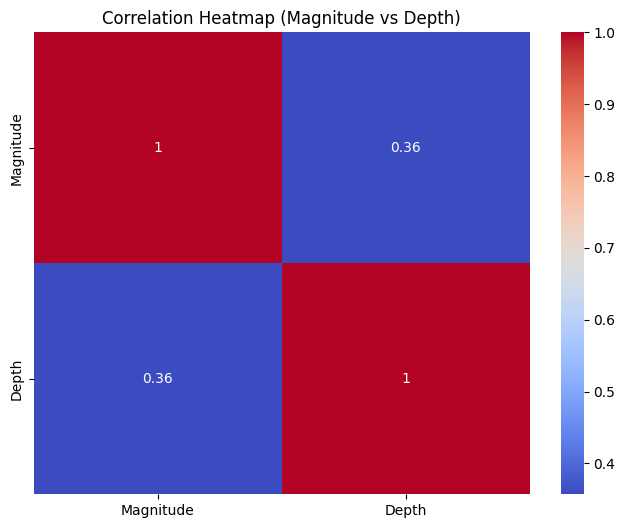

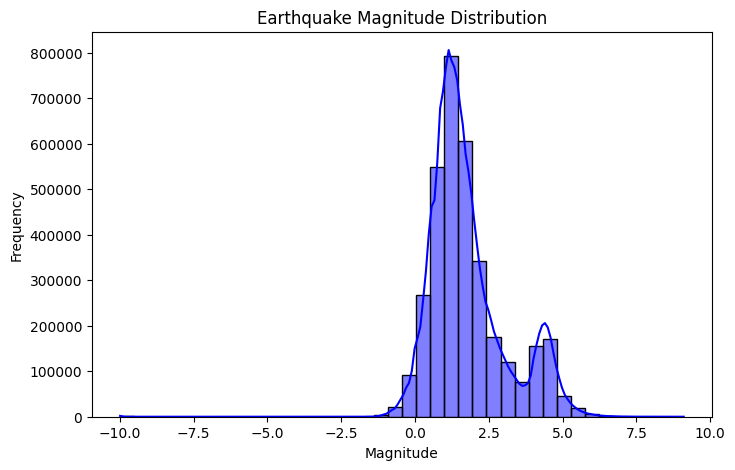

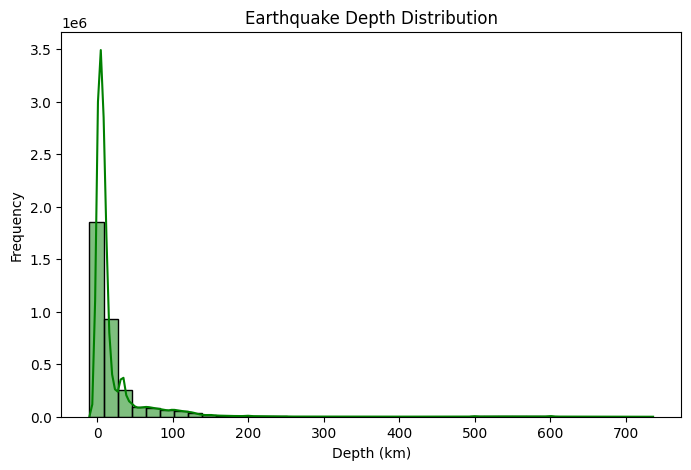

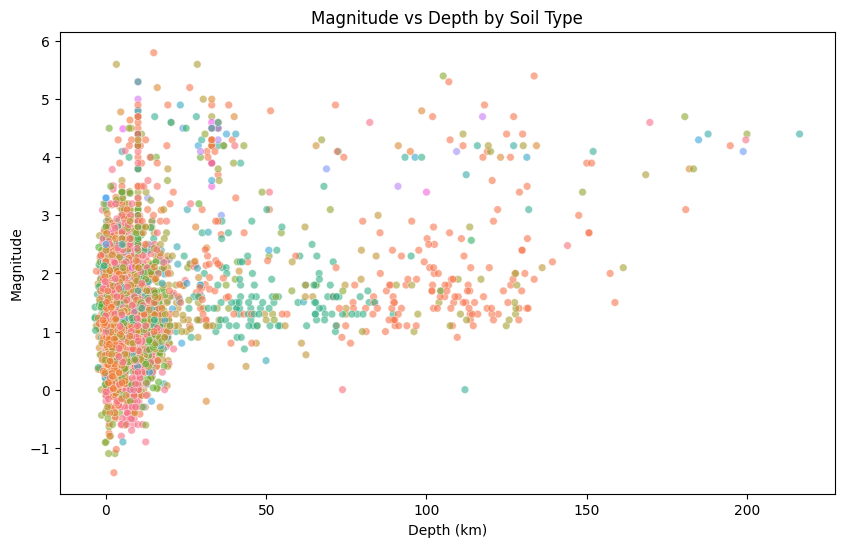

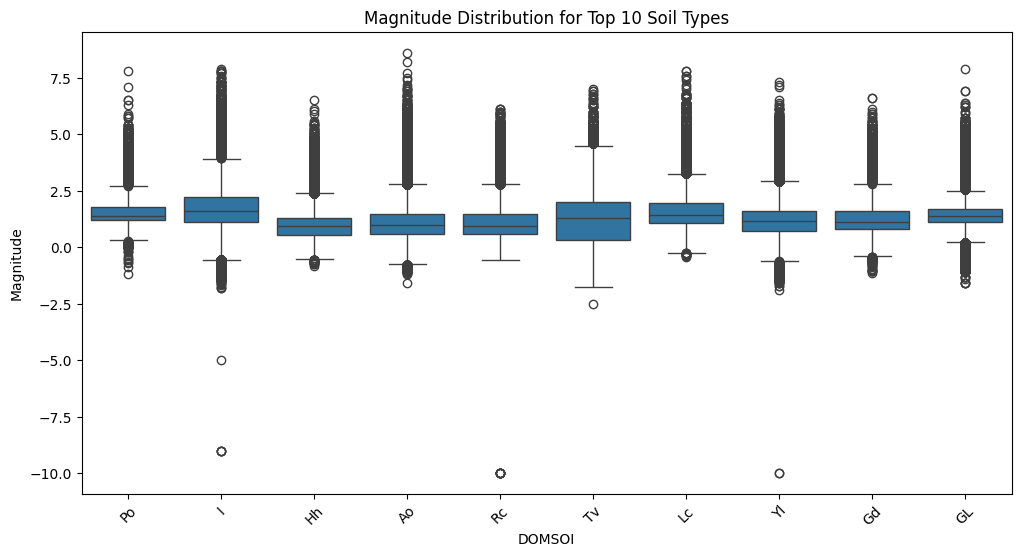

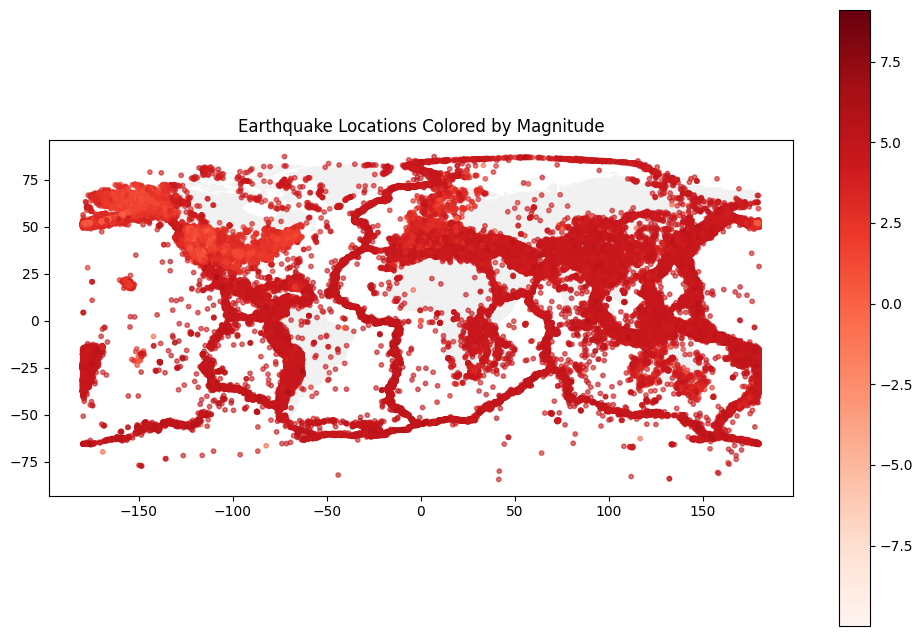

In [11]:
# --- Additional Exploratory Data Analysis ---

# 1. Missing values check
print("\nMissing values per column:")
print(eq_with_soil.isna().sum())

# 2. Correlation heatmap (numerical variables only)
plt.figure(figsize=(8,6))
sns.heatmap(eq_with_soil[['Magnitude','Depth']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Magnitude vs Depth)")
plt.show()

# 3. Magnitude histogram
plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Magnitude'], bins=40, kde=True, color="blue")
plt.title("Earthquake Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

# 4. Depth distribution
plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Depth'], bins=40, kde=True, color="green")
plt.title("Earthquake Depth Distribution")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.show()

# 5. Magnitude vs Depth scatter (colored by soil type)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=eq_with_soil.sample(5000, random_state=42),  # sample for clarity
    x="Depth", y="Magnitude", hue="DOMSOI", alpha=0.6, s=30, legend=False
)
plt.title("Magnitude vs Depth by Soil Type")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

# 6. Top N soil types vs Magnitude
top_soils = eq_with_soil['DOMSOI'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(
    data=eq_with_soil[eq_with_soil['DOMSOI'].isin(top_soils)],
    x="DOMSOI", y="Magnitude"
)
plt.title("Magnitude Distribution for Top 10 Soil Types")
plt.xticks(rotation=45)
plt.show()

# 7. Map: magnitude intensity
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
soil_data.plot(ax=ax, color="lightgrey", alpha=0.3)
eq_with_soil.plot(
    ax=ax,
    column="Magnitude",
    cmap="Reds",
    markersize=10,
    alpha=0.6,
    legend=True
)
ax.set_title("Earthquake Locations Colored by Magnitude")
plt.show()


API dataset columns: ['time', 'place', 'magnitude', 'longitude', 'latitude', 'depth']
Historical dataset columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Year']
Common columns available: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source']

Date column types before conversion:
df_api Date type: datetime64[ns]
df Date type: datetime64[ns]
Failed date conversions in df_api: 0
Failed date conversions in df: 0
df_api Date type after conversion: datetime64[ns]
df_hist Date type after conversion: datetime64[ns]

Unified dataset shape: (3446243, 8)
Data sources distribution:
Source
Historical    3445751
API               492
Name: count, dtype: int64

First few rows:
                           Date   Latitude   Longitude   Depth  Magnitude  \
0 1970-01-01 00:10:31.153353990  61.730200 -149.669200  30.100       2.50   
1 1970-01-01 00:10:31.153491210  19.317667 -155.212333   6.585       1.41   
2 1970-01-01 00:10:31.154083450  38.821000 -12

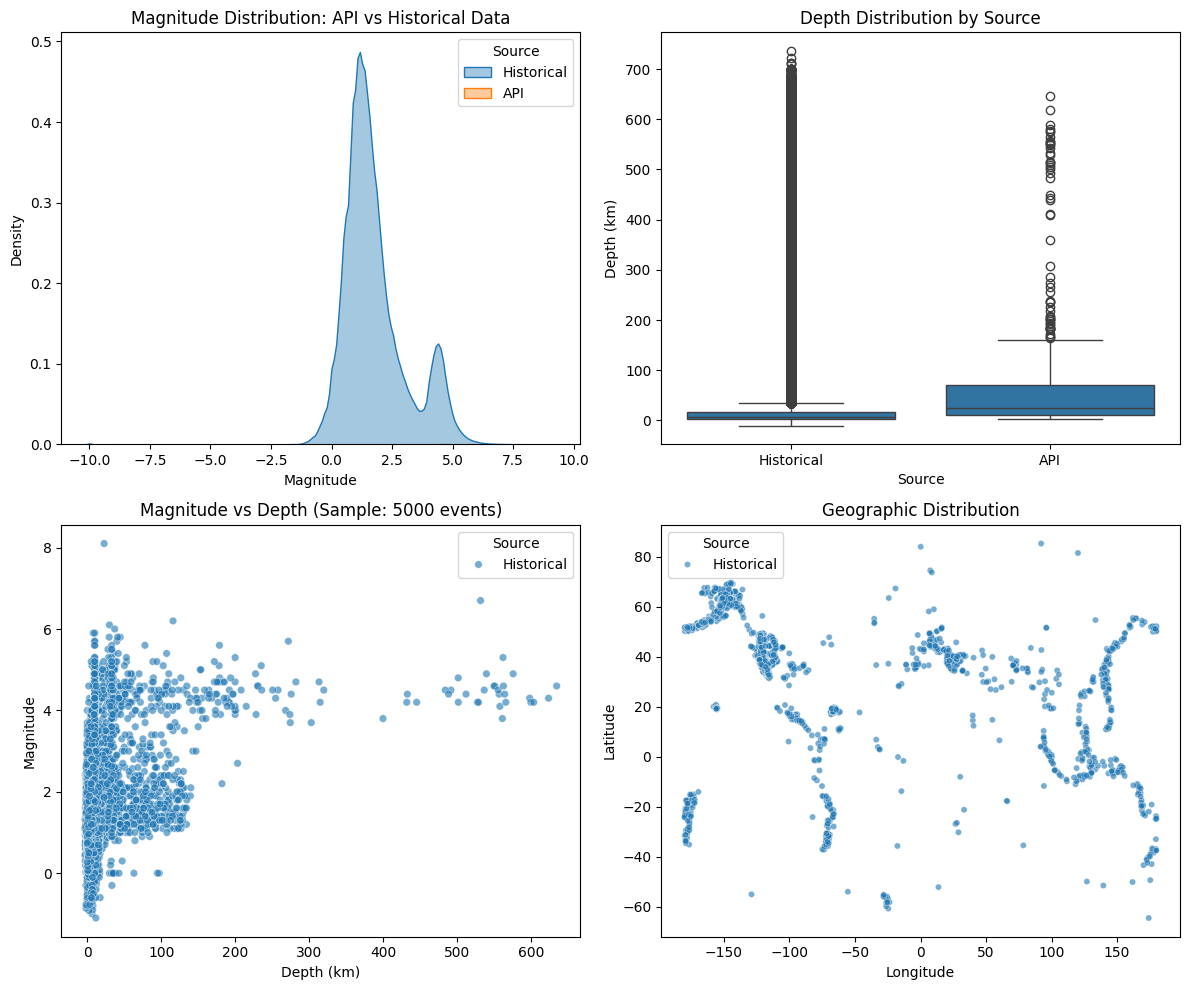

Date column type before Year extraction: datetime64[ns]


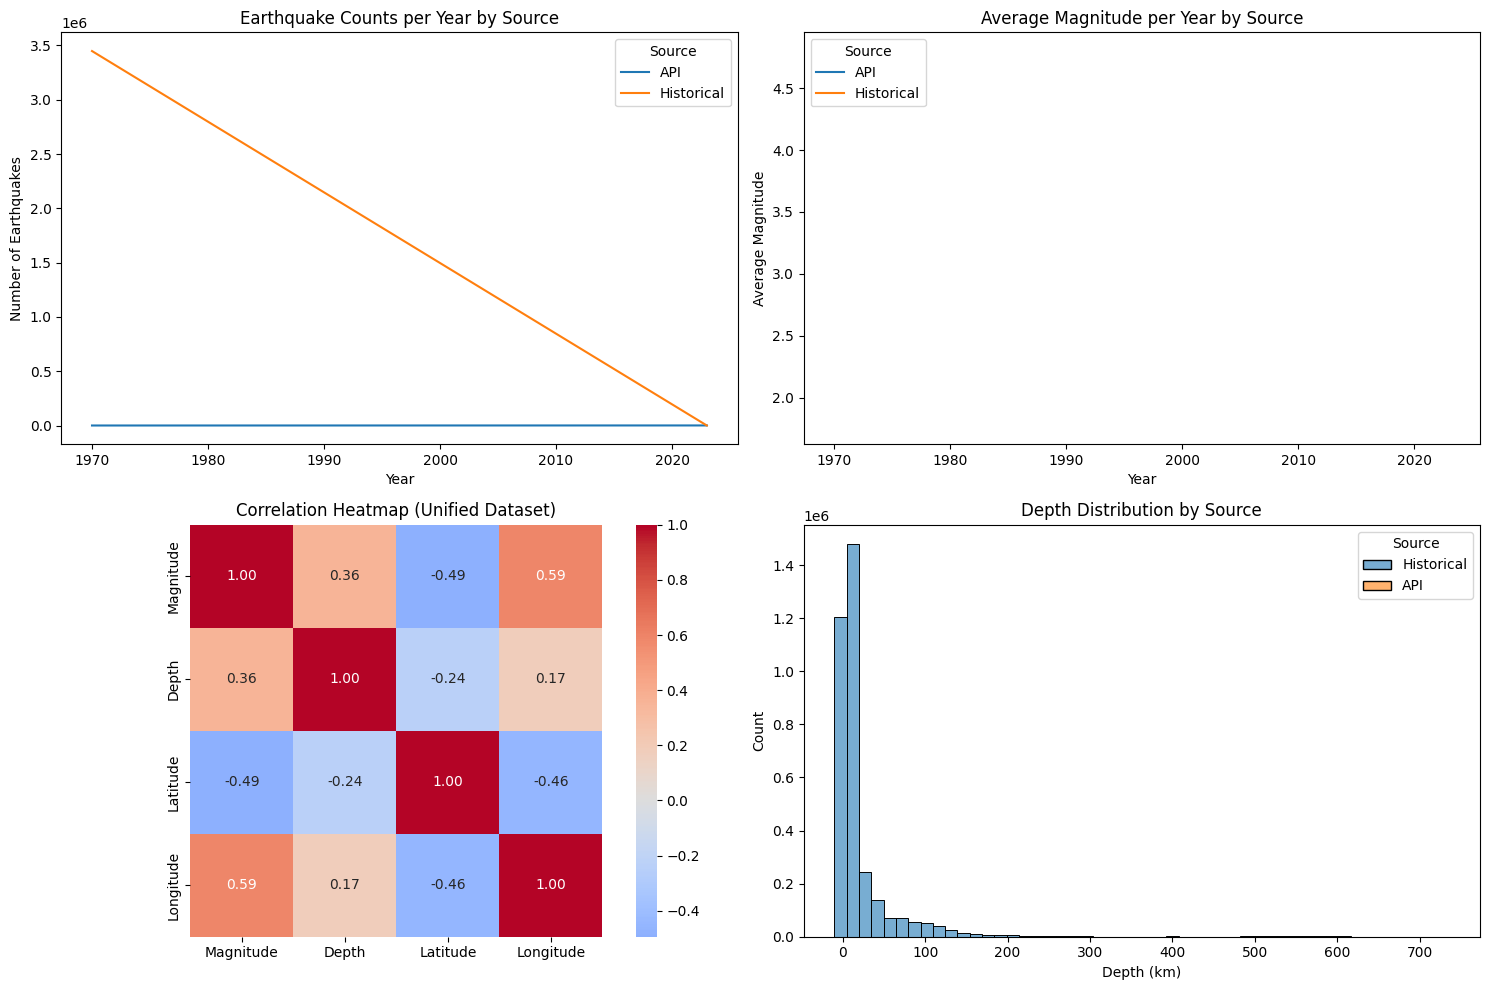

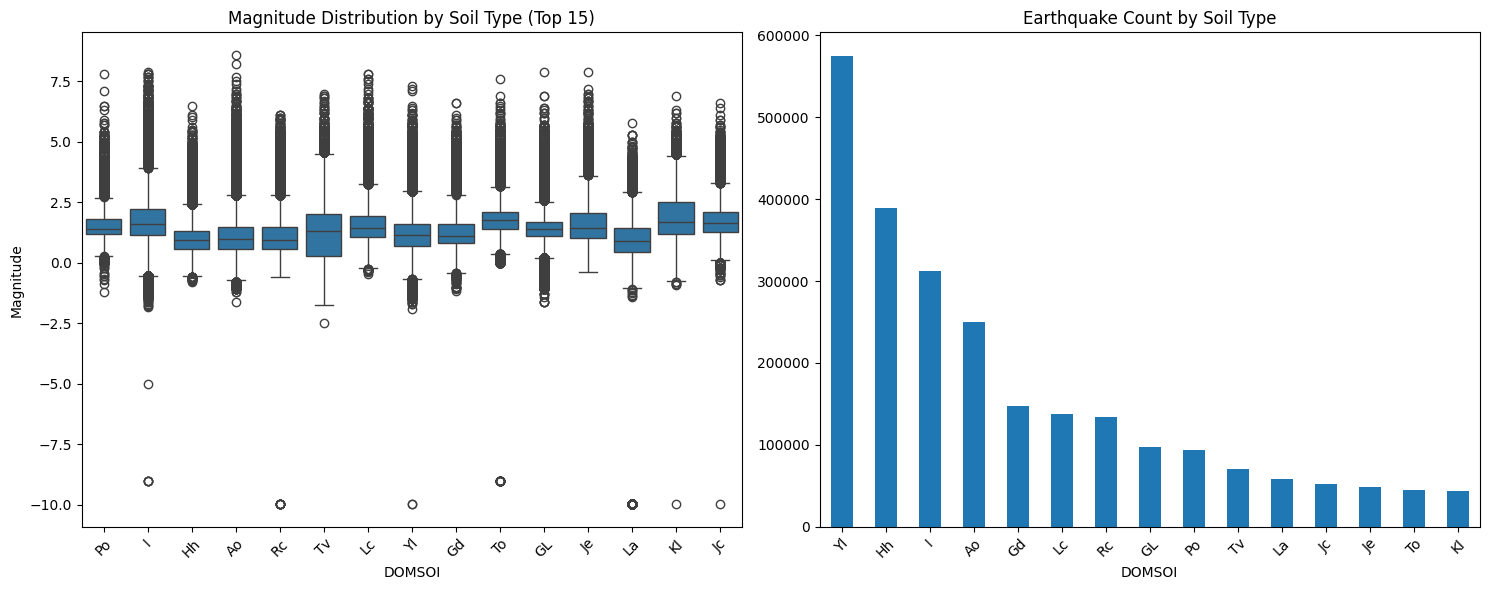


=== SOIL TYPE ANALYSIS ===
       Magnitude                  Depth         
           count   mean    std     mean      std
DOMSOI                                          
Af          1318  3.892  1.127   23.203   35.002
Ag           329  1.956  1.114   10.682   21.996
Ah         30132  1.531  1.063   12.188   19.238
Ao        249659  1.122  0.869    6.567   16.366
Ap           248  3.942  1.263  156.443  222.271
Bc          2590  3.104  1.331   24.469   43.387
Bd         19386  2.970  1.219   26.584   43.637
Be         33602  2.159  1.063   13.604   22.603
Bf           315  4.102  1.212   77.166   85.666
Bg           429  4.348  0.875   58.128   81.262


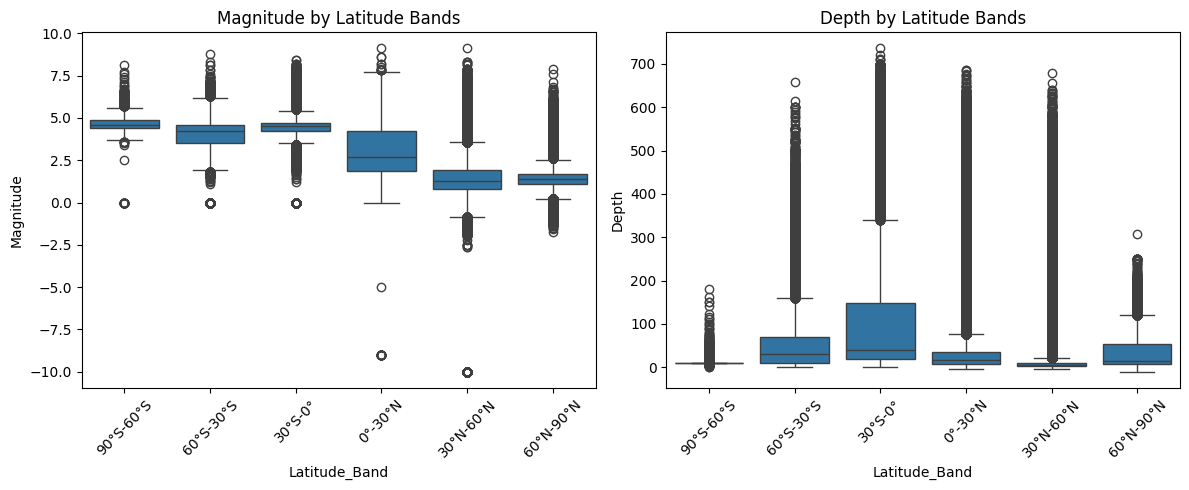


=== UNIFIED DATASET SUMMARY ===
Total earthquakes: 3,449,127
Time range: 1970-01-01 00:10:31.153353990 to 2023-08-31 21:43:25.888000
Geographic range: Lat(-84.4 to 87.4)
                 Lon(-180.0 to 180.0)
Magnitude range: -10.0 to 9.1
Depth range: -10.0 to 735.8 km

=== DATA QUALITY CHECK ===
Missing values per column:
Date                  0
Latitude              0
Longitude             0
Depth                 0
Magnitude             0
Location              0
Year                  0
Source                0
merge_id              0
DOMSOI           677655
Latitude_Band         0
dtype: int64

Soil data coverage: 80.4%

Unified dataset saved to: unified_earthquake_data.csv


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Step 1. Align API + Historical datasets ---
print("API dataset columns:", df_api.columns.tolist())
print("Historical dataset columns:", df.columns.tolist())

# Fix the column naming issue
df_api = df_api.rename(columns={
    "time": "Date",
    "latitude": "Latitude",
    "longitude": "Longitude",
    "depth": "Depth",
    "magnitude": "Magnitude",
    "place": "Location"
})

# Add source identifiers
df_api["Source"] = "API"
df["Source"] = "Historical"

# Handle missing 'Location' column if it doesn't exist in df_api
if 'Location' not in df_api.columns:
    df_api['Location'] = "Unknown"

# Keep consistent columns (ensure they exist in both datasets)
available_common_cols = []
for col in ["Date", "Latitude", "Longitude", "Depth", "Magnitude", "Location", "Source"]:
    if col in df_api.columns and col in df.columns:
        available_common_cols.append(col)

print("Common columns available:", available_common_cols)

df_api = df_api[available_common_cols]
df_hist = df[available_common_cols]

# --- Step 2. Fix timezone compatibility issue ---
print("\nDate column types before conversion:")
print(f"df_api Date type: {df_api['Date'].dtype}")
print(f"df Date type: {df['Date'].dtype}")

# Convert both to timezone-naive datetime to avoid conflicts
df_api['Date'] = pd.to_datetime(df_api['Date'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# If historical data has timezone info, remove it
if df['Date'].dtype == 'datetime64[ns, UTC]':
    df['Date'] = df['Date'].dt.tz_localize(None)

# Check for any failed conversions
print(f"Failed date conversions in df_api: {df_api['Date'].isna().sum()}")
print(f"Failed date conversions in df: {df['Date'].isna().sum()}")

# Remove rows with invalid dates
df_api = df_api.dropna(subset=['Date'])
df = df.dropna(subset=['Date'])

print(f"df_api Date type after conversion: {df_api['Date'].dtype}")
print(f"df_hist Date type after conversion: {df['Date'].dtype}")

# --- Step 3. Merge both datasets ---
df_all = pd.concat([df, df_api], ignore_index=True)

print("\nUnified dataset shape:", df_all.shape)
print("Data sources distribution:")
print(df_all['Source'].value_counts())
print("\nFirst few rows:")
print(df_all.head())
print(f"Unified Date type: {df_all['Date'].dtype}")

# --- Step 4. Attach Soil/Geological Data ---
# Create a unique identifier for merging
df_all['merge_id'] = df_all['Latitude'].round(3).astype(str) + '_' + df_all['Longitude'].round(3).astype(str)

# Prepare soil data with same identifier
if 'eq_with_soil' in globals():
    eq_with_soil['merge_id'] = eq_with_soil['Latitude'].round(3).astype(str) + '_' + eq_with_soil['Longitude'].round(3).astype(str)

    # Merge soil data
    df_all_geo = pd.merge(
        df_all,
        eq_with_soil[['merge_id', 'DOMSOI']].drop_duplicates(),
        on='merge_id',
        how='left'
    )
else:
    print("Soil data not available, proceeding without it")
    df_all_geo = df_all.copy()
    df_all_geo['DOMSOI'] = np.nan

print("\nUnified dataset with soil shape:", df_all_geo.shape)
print("Soil data coverage:", df_all_geo['DOMSOI'].notna().sum(), "out of", len(df_all_geo))
print("\nSample of unified dataset:")
print(df_all_geo.sample(5))

# --- Step 5. Comprehensive Exploratory Data Analysis Across Sources ---

# 1. Basic statistics by source
print("\n=== BASIC STATISTICS BY SOURCE ===")
print(df_all_geo.groupby('Source').agg({
    'Magnitude': ['count', 'mean', 'std', 'min', 'max'],
    'Depth': ['mean', 'std', 'min', 'max'],
    'Latitude': ['mean', 'std'],
    'Longitude': ['mean', 'std']
}).round(3))

# 2. Distribution plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df_all_geo, x="Magnitude", hue="Source", fill=True, alpha=0.4)
plt.title("Magnitude Distribution: API vs Historical Data")
plt.xlabel("Magnitude")

plt.subplot(2, 2, 2)
sns.boxplot(data=df_all_geo, x="Source", y="Depth")
plt.title("Depth Distribution by Source")
plt.ylabel("Depth (km)")

plt.subplot(2, 2, 3)
sample_size = min(5000, len(df_all_geo))
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Depth", y="Magnitude", hue="Source", alpha=0.6, s=30)
plt.title(f"Magnitude vs Depth (Sample: {sample_size} events)")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Longitude", y="Latitude", hue="Source", alpha=0.6, s=20)
plt.title("Geographic Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()

# 6. Time-based analysis (now that dates are properly formatted)
# Double-check date type before extracting year
print(f"Date column type before Year extraction: {df_all_geo['Date'].dtype}")

# If still not datetime, force conversion
if not pd.api.types.is_datetime64_any_dtype(df_all_geo['Date']):
    df_all_geo['Date'] = pd.to_datetime(df_all_geo['Date'], errors='coerce')
    # Remove any rows with invalid dates
    df_all_geo = df_all_geo.dropna(subset=['Date'])

df_all_geo['Year'] = df_all_geo['Date'].dt.year

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
yearly_counts = df_all_geo.groupby(['Year', 'Source']).size().unstack(fill_value=0)
yearly_counts.plot(kind='line', ax=plt.gca())
plt.title("Earthquake Counts per Year by Source")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.legend(title="Source")

plt.subplot(2, 2, 2)
yearly_magnitude = df_all_geo.groupby(['Year', 'Source'])['Magnitude'].mean().unstack()
yearly_magnitude.plot(kind='line', ax=plt.gca())
plt.title("Average Magnitude per Year by Source")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.legend(title="Source")

plt.subplot(2, 2, 3)
correlation_data = df_all_geo[['Magnitude', 'Depth', 'Latitude', 'Longitude']].corr()
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", center=0,
            square=True, fmt=".2f")
plt.title("Correlation Heatmap (Unified Dataset)")

plt.subplot(2, 2, 4)
sns.histplot(data=df_all_geo, x='Depth', hue='Source', bins=50, alpha=0.6)
plt.title("Depth Distribution by Source")
plt.xlabel("Depth (km)")

plt.tight_layout()
plt.show()

# 7. Soil type analysis (if available)
if df_all_geo['DOMSOI'].notna().sum() > 0:
    plt.figure(figsize=(15, 6))

    top_soils = df_all_geo['DOMSOI'].value_counts().head(15).index
    soil_data_subset = df_all_geo[df_all_geo['DOMSOI'].isin(top_soils)]

    plt.subplot(1, 2, 1)
    sns.boxplot(data=soil_data_subset, x="DOMSOI", y="Magnitude")
    plt.title("Magnitude Distribution by Soil Type (Top 15)")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    soil_counts = soil_data_subset['DOMSOI'].value_counts()
    soil_counts.plot(kind='bar')
    plt.title("Earthquake Count by Soil Type")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    print("\n=== SOIL TYPE ANALYSIS ===")
    soil_stats = df_all_geo.groupby('DOMSOI').agg({
        'Magnitude': ['count', 'mean', 'std'],
        'Depth': ['mean', 'std']
    }).round(3)
    print(soil_stats.head(10))

# 8. Advanced spatial analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_all_geo['Latitude_Band'] = pd.cut(df_all_geo['Latitude'],
                                    bins=np.arange(-90, 91, 30),
                                    labels=['90°S-60°S', '60°S-30°S', '30°S-0°',
                                           '0°-30°N', '30°N-60°N', '60°N-90°N'])
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Magnitude')
plt.title("Magnitude by Latitude Bands")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Depth')
plt.title("Depth by Latitude Bands")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 9. Summary statistics for the unified dataset
print("\n=== UNIFIED DATASET SUMMARY ===")
print(f"Total earthquakes: {len(df_all_geo):,}")
print(f"Time range: {df_all_geo['Date'].min()} to {df_all_geo['Date'].max()}")
print(f"Geographic range: Lat({df_all_geo['Latitude'].min():.1f} to {df_all_geo['Latitude'].max():.1f})")
print(f"                 Lon({df_all_geo['Longitude'].min():.1f} to {df_all_geo['Longitude'].max():.1f})")
print(f"Magnitude range: {df_all_geo['Magnitude'].min():.1f} to {df_all_geo['Magnitude'].max():.1f}")
print(f"Depth range: {df_all_geo['Depth'].min():.1f} to {df_all_geo['Depth'].max():.1f} km")

# 10. Data quality check
print("\n=== DATA QUALITY CHECK ===")
print("Missing values per column:")
print(df_all_geo.isnull().sum())
print(f"\nSoil data coverage: {df_all_geo['DOMSOI'].notna().mean():.1%}")

# Save the unified dataset for future use
df_all_geo.to_csv(r'C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\unified_earthquake_data.csv', index=False)
print("\nUnified dataset saved to: unified_earthquake_data.csv")

In [15]:
#m
# Load unified dataset
import pandas as pd

df = pd.read_csv(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\unified_earthquake_data.csv")

print("Missing values per column before cleaning:")
print(df.isnull().sum())

# --- Strategy ---
# Numeric: fill with median
num_cols = ['Magnitude', 'Depth']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical: fill with mode
cat_cols = ['Location', 'DOMSOI']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save intermediate version
df.to_csv(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\earthquake_cleaned_day1.csv", index=False)


Missing values per column before cleaning:
Date                  0
Latitude              0
Longitude             0
Depth                 0
Magnitude             0
Location              0
Year                  0
Source                0
merge_id              0
DOMSOI           677655
Latitude_Band         0
dtype: int64

Missing values after imputation:
Date             0
Latitude         0
Longitude        0
Depth            0
Magnitude        0
Location         0
Year             0
Source           0
merge_id         0
DOMSOI           0
Latitude_Band    0
dtype: int64


In [5]:
#t
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\earthquake_cleaned_day1.csv")

# Select numeric features
numeric_features = ['Magnitude', 'Depth']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df_scaled[numeric_features].describe())

# Save scaled dataset
df_scaled.to_csv(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\earthquake_scaled_day2.csv", index=False)


          Magnitude         Depth
count  3.449127e+06  3.449127e+06
mean   5.424070e-16 -2.837287e-16
std    1.000000e+00  1.000000e+00
min   -9.111357e+00 -5.988987e-01
25%   -6.692601e-01 -3.596953e-01
50%   -2.432827e-01 -2.761929e-01
75%    4.073010e-01 -1.228621e-01
max    5.673930e+00  1.299850e+01


In [ ]:
#w
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\earthquake_scaled_day2.csv")

# Encode Soil Type (DOMSOI)
if 'DOMSOI' in df.columns:
    encoder = LabelEncoder()
    df['SoilType_Encoded'] = encoder.fit_transform(df['DOMSOI'])
else:
    df['SoilType_Encoded'] = -1  # fallback if missing

# Encode Location (optional, may be too high-cardinality)
df['Location_Encoded'] = LabelEncoder().fit_transform(df['Location'])

print(df[['DOMSOI', 'SoilType_Encoded']].head())

# Save encoded dataset
df.to_csv(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\earthquake_encoded_day3.csv", index=False)


  DOMSOI  SoilType_Encoded
0     Po                73
1      I                43
2     Hh                41
3     Ao                 3
4     Rc                81


In [2]:
#t
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\earthquake_encoded_day3.csv")

# 1. Magnitude Category
df['Magnitude_Class'] = pd.cut(
    df['Magnitude'],
    bins=[0, 4, 6, 7, 10],
    labels=['Low', 'Moderate', 'Strong', 'Major']
)

# 2. Depth Category
df['Depth_Class'] = pd.cut(
    df['Depth'],
    bins=[-1, 70, 300, 700],
    labels=['Shallow', 'Intermediate', 'Deep']
)

# 3. Risk Score (simple weighted sum)
df['Risk_Score'] = (
    (df['Magnitude'] * 0.7) +
    (np.log1p(df['Depth']) * 0.3)
)

# 4. Spatial Clusters
coords = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Region_Cluster'] = kmeans.fit_predict(coords)

print(df[['Magnitude', 'Depth', 'Risk_Score', 'Region_Cluster']].head())

# Save engineered dataset
df.to_csv(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\earthquake_features_day4.csv", index=False)


   Magnitude     Depth  Risk_Score  Region_Cluster
0   0.562202  0.132203    0.430791               3
1  -0.282008 -0.296522   -0.302921               1
2  -0.514359 -0.357872   -0.492942               1
3  -0.615045 -0.427227   -0.597711               1
4   0.910729 -0.122643    0.598258               1


In [3]:
#f
# Load latest version
df_final = pd.read_csv(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\earthquake_features_day4.csv")

print("Final dataset shape:", df_final.shape)
print("Final columns:", df_final.columns.tolist())

# Save final dataset for modeling
df_final.to_csv(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\earthquake_preprocessed_week2.csv", index=False)


Final dataset shape: (3449127, 17)
Final columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Year', 'Source', 'merge_id', 'DOMSOI', 'Latitude_Band', 'SoilType_Encoded', 'Location_Encoded', 'Magnitude_Class', 'Depth_Class', 'Risk_Score', 'Region_Cluster']


🚀 Starting optimized Random Forest pipeline...
✅ Loaded dataset with 3449127 rows and 17 columns


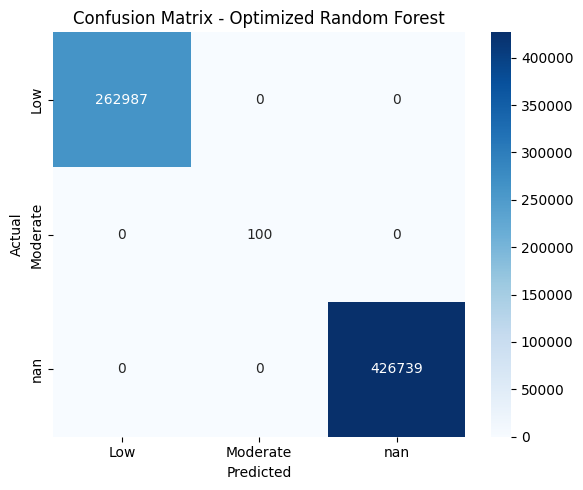


📊 Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00    262987
    Moderate       1.00      1.00      1.00       100
         nan       1.00      1.00      1.00    426739

    accuracy                           1.00    689826
   macro avg       1.00      1.00      1.00    689826
weighted avg       1.00      1.00      1.00    689826



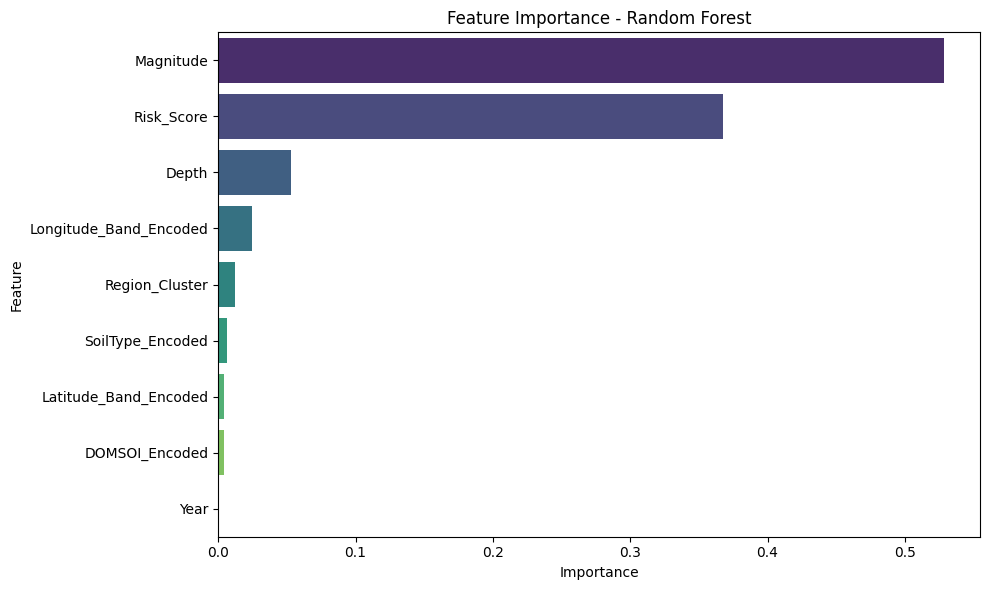


✅ Cross-validated Accuracy: 1.000 ± 0.000

⏱️ Optimized Random Forest pipeline completed in 459.95 seconds.


In [15]:
# === ⚡ Optimized Random Forest for Earthquake Damage Prediction ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import time
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()
print("🚀 Starting optimized Random Forest pipeline...")

# === Load preprocessed dataset ===
file_path = r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\earthquake_features_day4.csv"
df = pd.read_csv(file_path)
print(f"✅ Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns")

# === Feature Engineering ===
# Risk Score (weighted sum)
df['Risk_Score'] = df['Magnitude'] * 0.7 + np.log1p(df['Depth']) * 0.3

# Year feature
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
else:
    df['Year'] = 2000  # fallback

# Latitude and Longitude Bands
df['Latitude_Band'] = pd.cut(df['Latitude'], bins=np.arange(-90, 91, 30),
                             labels=['90°S-60°S', '60°S-30°S', '30°S-0°', '0°-30°N', '30°N-60°N', '60°N-90°N'])
df['Longitude_Band'] = pd.cut(df['Longitude'], bins=np.arange(-180, 181, 60),
                              labels=['180°W-120°W', '120°W-60°W', '60°W-0°', '0°-60°E', '60°E-120°E', '120°E-180°E'])

# Encode categorical features
for col in ['DOMSOI', 'Latitude_Band', 'Longitude_Band']:
    if col in df.columns:
        df[f'{col}_Encoded'] = LabelEncoder().fit_transform(df[col].astype(str))
    else:
        df[f'{col}_Encoded'] = 0

# Target variable
if 'Magnitude_Class' not in df.columns:
    df['Magnitude_Class'] = pd.cut(
        df['Magnitude'],
        bins=[0, 4, 6, 7, 10],
        labels=['Low', 'Moderate', 'Strong', 'Major']
    )

label_encoder = LabelEncoder()
df['Damage_Label'] = label_encoder.fit_transform(df['Magnitude_Class'].astype(str))
joblib.dump(label_encoder, r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\label_encoder.pkl")

# === Features & Target ===
feature_cols = [
    'Magnitude', 'Depth', 'Risk_Score', 'SoilType_Encoded', 'Region_Cluster',
    'DOMSOI_Encoded', 'Latitude_Band_Encoded', 'Longitude_Band_Encoded', 'Year'
]
X = df[feature_cols]
y = df['Damage_Label']

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Scale numeric columns ===
numeric_features = ['Magnitude', 'Depth', 'Risk_Score', 'Year']
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# === Random Forest Classifier ===
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# === Predictions & Evaluation ===
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Optimized Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Cross-validation (3-fold)
cv_scores = cross_val_score(rf, X, y, cv=3, scoring='accuracy', n_jobs=-1)
print(f"\n✅ Cross-validated Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Save model and scaler
joblib.dump(rf, r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\optimized_rf_model.pkl")
joblib.dump(scaler, r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\optimized_scaler.pkl")

end_time = time.time()
print(f"\n⏱️ Optimized Random Forest pipeline completed in {end_time - start_time:.2f} seconds.")



📊 Model Performance Summary:
Logistic Regression: Accuracy = 0.997, F1-score = 0.997
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00    262987
    Moderate       0.35      1.00      0.52       100
         nan       1.00      1.00      1.00    426739

    accuracy                           1.00    689826
   macro avg       0.78      1.00      0.84    689826
weighted avg       1.00      1.00      1.00    689826

Decision Tree: Accuracy = 1.000, F1-score = 1.000
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00    262987
    Moderate       1.00      1.00      1.00       100
         nan       1.00      1.00      1.00    426739

    accuracy                           1.00    689826
   macro avg       1.00      1.00      1.00    689826
weighted avg       1.00      1.00      1.00    689826

Random Forest: Accuracy = 1.000, F1-score = 1.000
              precision    recall  f1-score   suppor

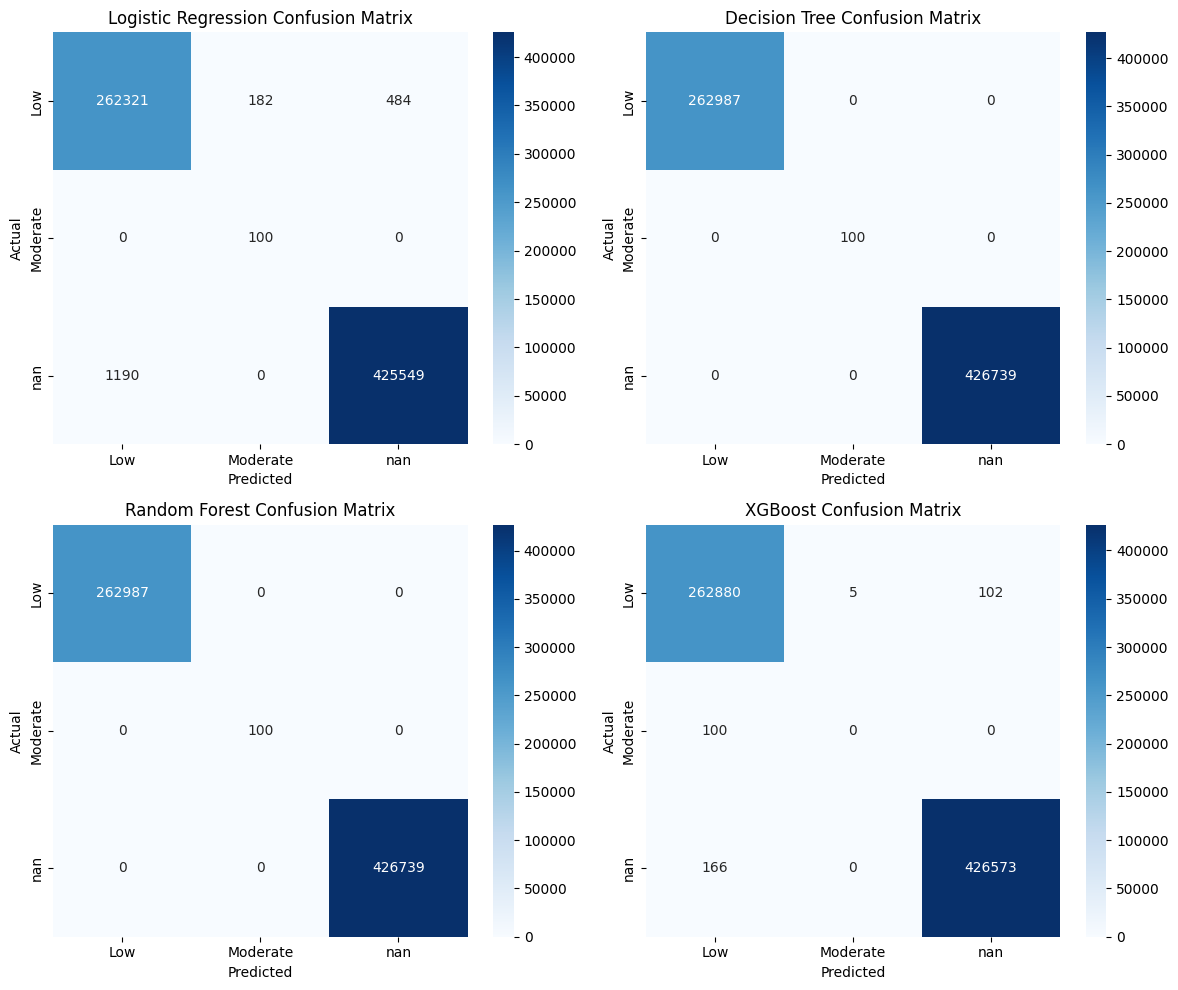

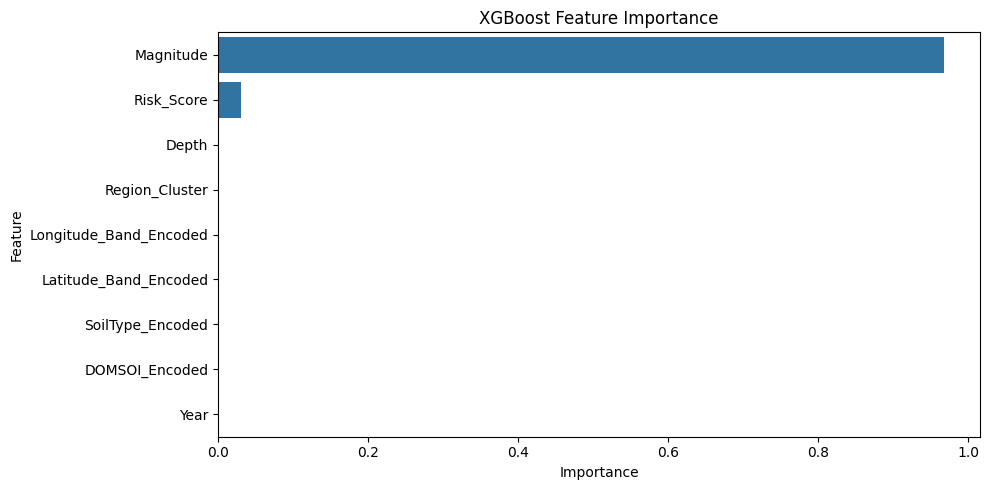

['xgboost_model.pkl']

In [16]:
# === 🔍 Milestone 3: Baseline & Advanced Model Comparison ===
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Logistic Regression ---
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# --- Decision Tree ---
dtree = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# --- XGBoost ---
xgb = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1,
                    subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# --- Model Comparison ---
models = {
    "Logistic Regression": y_pred_logreg,
    "Decision Tree": y_pred_dtree,
    "Random Forest": y_pred,
    "XGBoost": y_pred_xgb
}

print("\n📊 Model Performance Summary:")
for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='weighted')
    print(f"{name}: Accuracy = {acc:.3f}, F1-score = {f1:.3f}")
    print(classification_report(y_test, preds, target_names=label_encoder.classes_))

# --- Confusion Matrices ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
model_names = list(models.keys())
predictions = list(models.values())

for i, ax in enumerate(axes):
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_,
                ax=ax)
    ax.set_title(f"{model_names[i]} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# --- Feature Importance: XGBoost ---
xgb_importances = pd.Series(xgb.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_importances.values, y=xgb_importances.index)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# --- Save Models ---
import joblib
joblib.dump(logreg, "logistic_model.pkl")
joblib.dump(dtree, "decision_tree_model.pkl")
joblib.dump(xgb, "xgboost_model.pkl")


🔍 SHAP Summary - Random Forest


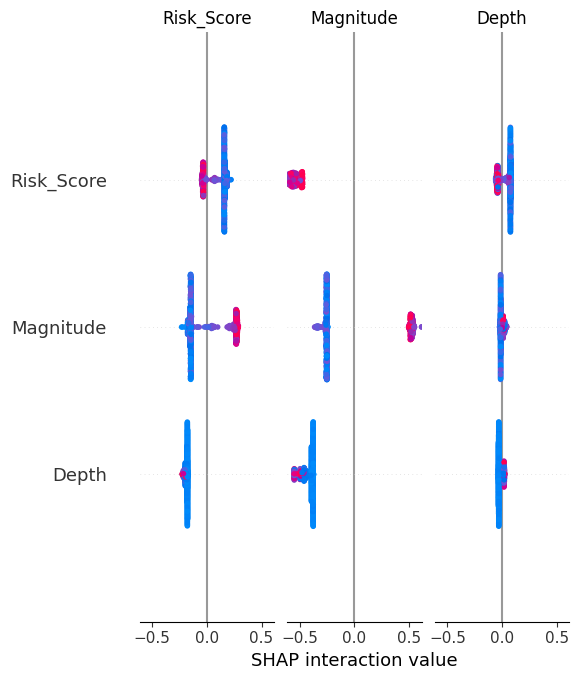

ExactExplainer explainer: 1001it [00:48, 18.91it/s]                         


🔍 SHAP Summary - XGBoost (Class 0)


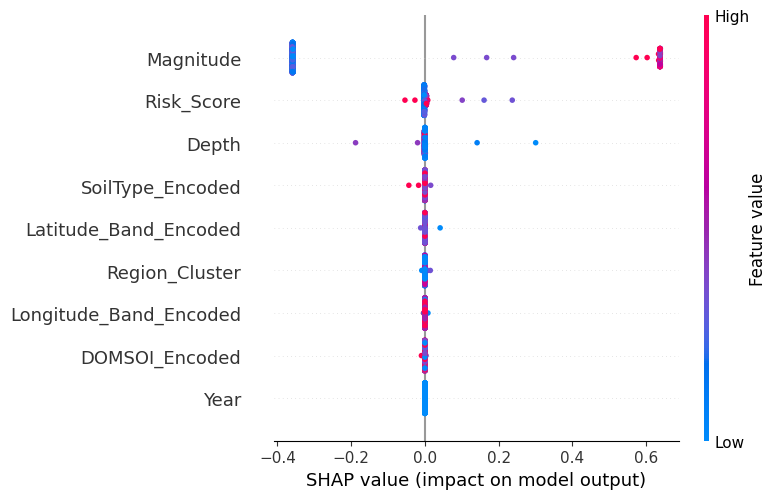

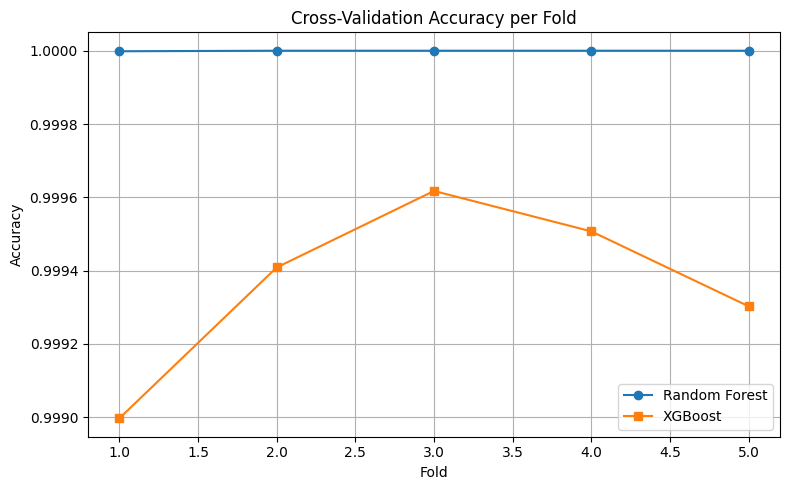

In [35]:
# === 📊 SHAP Explainability & Cross-Validation Accuracy ===
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# --- Sample subset for SHAP analysis ---
X_sample = X_train.sample(n=1000, random_state=42)

# === SHAP: Random Forest ===
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_sample)

print("🔍 SHAP Summary - Random Forest")
shap.summary_plot(shap_values_rf, X_sample, feature_names=feature_cols)

# === SHAP: XGBoost (multi-class safe) ===
explainer_xgb = shap.Explainer(xgb_model.predict_proba, X_sample, feature_names=feature_cols)
shap_values_xgb = explainer_xgb(X_sample)

print("🔍 SHAP Summary - XGBoost (Class 0)")
shap.summary_plot(shap_values_xgb[..., 0], X_sample, feature_names=feature_cols)

# === Cross-Validation Accuracy Plot ===
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores_rf, marker='o', label='Random Forest')
plt.plot(range(1, 6), cv_scores_xgb, marker='s', label='XGBoost')
plt.title("Cross-Validation Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import gradio as gr
import pickle
import pandas as pd
import joblib
import os

# Load Model & Encoder (with error handling)
try:
    model = pickle.load(open("optimized_rf_model.pkl", "rb"))
    label_encoder = joblib.load(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\label_encoder.pkl")
    MODEL_LOADED = True
except FileNotFoundError as e:
    print(f"Model file not found: {e}")
    MODEL_LOADED = False

# Create flat list of ALL soil types for the dropdown
SOIL_CHOICES = [
    (0, "Af - Arenosols (Ferric)"),
    (1, "Ag - Arenosols (Gleyic)"),
    (2, "Ah - Arenosols (Haplic)"),
    (3, "Ao - Arenosols (Albic)"),
    (4, "Ap - Arenosols (Protic)"),
    (5, "Bc - Cambisols (Chromic)"),
    (6, "Bd - Cambisols (Dystric)"),
    (7, "Be - Cambisols (Eutric)"),
    (8, "Bf - Cambisols (Ferralic)"),
    (9, "Bg - Cambisols (Gleyic)"),
    (10, "Bh - Cambisols (Humic)"),
    (11, "Bk - Cambisols (Calcic)"),
    (12, "Bv - Cambisols (Vertic)"),
    (13, "Bx - Cambisols (Toxic)"),
    (14, "Ch - Chernozems (Haplic)"),
    (15, "Ck - Chernozems (Calcic)"),
    (16, "Cl - Calcisols (Haplic)"),
    (17, "DS - Drained Soils (or Dystric Subgroup)"),
    (18, "Dd - Podzols (Dystric)"),
    (19, "Dg - Podzols (Gleyic)"),
    (20, "E - Rendzinas or Leptosols"),
    (21, "Fa - Fluvisols (Arenic)"),
    (22, "Fh - Fluvisols (Haplic)"),
    (23, "Fo - Fluvisols (Thionic)"),
    (24, "Fp - Fluvisols (Eutric)"),
    (25, "Fr - Fluvisols (Calcaric)"),
    (26, "Fx - Fluvisols (Toxic)"),
    (27, "GL - Gleysols (Haplic)"),
    (28, "Gc - Gleysols (Calcaric)"),
    (29, "Gd - Gleysols (Dystric)"),
    (30, "Ge - Gleysols (Eutric)"),
    (31, "Gh - Gleysols (Humic)"),
    (32, "Gm - Gleysols (Mollic)"),
    (33, "Gp - Gleysols (Pachic)"),
    (34, "Gx - Gleysols (Toxic)"),
    (35, "Hc - Phaeozems (Calcic)"),
    (36, "Hg - Phaeozems (Gleyic)"),
    (37, "Hh - Phaeozems (Haplic)"),
    (38, "Hl - Phaeozems (Luvic)"),
    (39, "I - Lithosols or Leptosols"),
    (40, "J - Fluvisols (General)"),
    (41, "Jc - Fluvisols (Calcaric)"),
    (42, "Jd - Fluvisols (Dystric)"),
    (43, "Je - Fluvisols (Eutric)"),
    (44, "Jt - Fluvisols (Thionic)"),
    (45, "K - Calcisols (General)"),
    (46, "Kh - Calcisols (Haplic)"),
    (47, "Kk - Calcisols (Petric)"),
    (48, "Kl - Calcisols (Luvic)"),
    (49, "La - Lavisols (Arenic)"),
    (50, "Lc - Lavisols (Chromic)"),
    (51, "Lf - Lavisols (Ferric)"),
    (52, "Lg - Lavisols (Gleyic)"),
    (53, "Lk - Lavisols (Calcic)"),
    (54, "Lo - Lavisols (Albic)"),
    (55, "Lv - Lavisols (Vertic)"),
    (56, "Mo - Mollic Solonetz"),
    (57, "ND - No Data"),
    (58, "Nd - Nudosols (Dystric)"),
    (59, "Ne - Nudosols (Eutric)"),
    (60, "Nh - Nudosols (Haplic)"),
    (61, "O - Histosols (General)"),
    (62, "Od - Histosols (Dystric)"),
    (63, "Oe - Histosols (Eutric)"),
    (64, "Pg - Planosols (Gleyic)"),
    (65, "Ph - Planosols (Haplic)"),
    (66, "Pl - Planosols (Mollic)"),
    (67, "Po - Planosols (Eutric)"),
    (68, "Qa - Acrisols (Arenic)"),
    (69, "Qc - Acrisols (Chromic)"),
    (70, "Qf - Acrisols (Ferric)"),
    (71, "Ql - Acrisols (Gleyic)"),
    (72, "R - Regosols (General)"),
    (73, "Rc - Regosols (Calcaric)"),
    (74, "Rd - Regosols (Dystric)"),
    (75, "Re - Regosols (Eutric)"),
    (76, "Rx - Regosols (Toxic)"),
    (77, "ST - Salt Marsh Soils or Solonchaks"),
    (78, "Sm - Solonchaks (Mollic)"),
    (79, "So - Solonchaks (Haplic)"),
    (80, "Th - Andosols (Haplic)"),
    (81, "Tm - Andosols (Mollic)"),
    (82, "To - Andosols (Vitric)"),
    (83, "Tv - Andosols (Vertic)"),
    (84, "U - Rankers or Umbrisols"),
    (85, "V - Vertisols (General)"),
    (86, "Vc - Vertisols (Chromic)"),
    (87, "Vp - Vertisols (Pellic)"),
    (88, "W - Waste/Urban Land"),
    (89, "WR - Water Bodies"),
    (90, "Wd - Water (Deep)"),
    (91, "We - Water (Shallow/Estuarine)"),
    (92, "Wm - Water (Marine)"),
    (93, "Ws - Water (Saline)"),
    (94, "X - Xerosols"),
    (95, "Xh - Xerosols (Haplic)"),
    (96, "Xk - Xerosols (Calcic)"),
    (97, "Xl - Xerosols (Luvic)"),
    (98, "Xy - Xerosols (Gypsic)"),
    (99, "Y - Yermosols"),
    (100, "Yh - Yermosols (Haplic)"),
    (101, "Yk - Yermosols (Calcic)"),
    (102, "Yl - Yermosols (Luvic)"),
    (103, "Yt - Yermosols (Takyric)"),
    (104, "Yy - Yermosols (Gypsic)"),
    (105, "Z - Solonetz (General)"),
    (106, "Zg - Solonetz (Gleyic)"),
    (107, "Zm - Solonetz (Mollic)"),
    (108, "Zo - Solonetz (Haplic)"),
    (109, "Zt - Solonetz (Takyric)")
]

# Create dictionary for lookup
SOIL_DICT = {soil_id: soil_name for soil_id, soil_name in SOIL_CHOICES}

# Region clusters with descriptive names
REGION_CHOICES = [
    (0, "Cluster 0 - Low Seismic Risk"),
    (1, "Cluster 1 - Moderate Seismic Risk"),
    (2, "Cluster 2 - High Seismic Risk"),
    (3, "Cluster 3 - Very High Seismic Risk"),
    (4, "Cluster 4 - Extreme Seismic Risk"),
    (5, "Cluster 5 - Critical Seismic Risk")
]

REGION_DICT = {region_id: region_name for region_id, region_name in REGION_CHOICES}

def predict_damage(magnitude, depth, soil_type, region_cluster):
    # Input validation
    if not MODEL_LOADED:
        return "❌ **Error:** Model files not loaded. Please check if 'best_random_forest.pkl' and 'label_encoder.pkl' exist."

    if magnitude is None or depth is None:
        return "❌ Please enter both Magnitude and Depth values"

    if magnitude < 0 or depth < 0:
        return "❌ Magnitude and Depth must be positive values"

    try:
        # Create input dataframe
        df = pd.DataFrame([{
            "Magnitude": float(magnitude),
            "Depth": float(depth),
            "SoilType_Encoded": int(soil_type),
            "Region_Cluster": int(region_cluster)
        }])

        # Make prediction
        pred = model.predict(df)[0]
        decoded = label_encoder.inverse_transform([pred])[0]

        # Get human-readable labels
        soil_name = SOIL_DICT.get(soil_type, f"Soil Type {soil_type}")
        region_name = REGION_DICT.get(region_cluster, f"Region {region_cluster}")

        return f"""
###  Earthquake Damage Prediction Results

** Predicted Damage Category:** **{decoded}**

** Input Parameters:**
**Magnitude:** {magnitude} (Richter scale)
**Depth:** {depth} km
**Soil Type:** {soil_name}
**Region:** {region_name}

---
Based on Random Forest model analysis
"""

    except Exception as e:
        return f"❌ **Prediction Error:** {str(e)}"

# Create the interface
with gr.Blocks(theme=gr.themes.Soft(), title="Earthquake Damage Predictor") as demo:
    gr.Markdown("# 🌍 Earthquake Damage Predictor")
    gr.Markdown("""
    This tool predicts structural damage risk levels based on seismic parameters using a trained Random Forest model.
    Enter the earthquake characteristics and soil/region information to get a damage category prediction.
    """)

    with gr.Row():
        with gr.Column():
            magnitude = gr.Number(
                label="Magnitude (Richter Scale)",
                minimum=0.0,
                maximum=10.0,
                value=5.5,
                step=0.1,
                info="Earthquake magnitude (typically 3.0-9.0)"
            )
            depth = gr.Number(
                label="Depth (km)",
                minimum=0.0,
                maximum=700.0,
                value=10.0,
                step=1.0,
                info="Depth of earthquake epicenter"
            )

        with gr.Column():
            # Simple dropdown with all soil types
            soil_type = gr.Dropdown(
                choices=SOIL_CHOICES,
                label="Soil Type",
                value=0,
                info="Select soil type - includes all 110 soil types with codes and full names",
                filterable=True  # Makes it searchable!
            )
            region_cluster = gr.Dropdown(
                choices=REGION_CHOICES,
                label="Region Cluster",
                value=0,
                info="Seismic region classification based on historical data"
            )

    predict_btn = gr.Button("🚀 Predict Damage", variant="primary", size="lg")

    output = gr.Markdown()

    # Examples for quick testing
    gr.Examples(
        label="💡 Quick Test Examples",
        examples=[
            [5.5, 10, 0, 0],   # Moderate quake, shallow, Arenosols, low risk region
            [7.2, 35, 5, 3],   # Strong quake, medium depth, Cambisols, high risk region
            [6.0, 15, 27, 1]   # Medium quake, shallow, Gleysols, moderate risk region
        ],
        inputs=[magnitude, depth, soil_type, region_cluster]
    )

    # Soil type guide
    with gr.Accordion("Soil Type Quick Guide", open=False):
        gr.Markdown("""
        **Major Soil Groups:**
        - **Arenosols** (Af, Ag, Ah, Ao, Ap) - Sandy soils
        - **Cambisols** (Bc, Bd, Be, Bf, Bg, Bh, Bk, Bv, Bx) - Young soils
        - **Fluvisols** (Fa, Fh, Fo, Fp, Fr, Fx, J, Jc, Jd, Je, Jt) - Floodplain soils
        - **Gleysols** (GL, Gc, Gd, Ge, Gh, Gm, Gp, Gx) - Waterlogged soils
        - **Calcisols** (Cl, Kh, Kk, Kl, K, Qa, Qc, Qf, Ql) - Calcium-rich soils
        - **Chernozems** (Ch, Ck) & **Phaeozems** (Hc, Hg, Hh, Hl) - Fertile black soils
        - **Andosols** (Th, Tm, To, Tv) - Volcanic soils
        - **Saline Soils** (ST, Sm, So, X, Y series) - Salt-affected soils
        """)

    # Footer
    gr.Markdown("---")
    gr.Markdown("*Note: Predictions are based on machine learning model and should be used for reference purposes*")

    predict_btn.click(
        fn=predict_damage,
        inputs=[magnitude, depth, soil_type, region_cluster],
        outputs=output
    )

if __name__ == "__main__":
    demo.launch(
        share=False,  # Set to True for public sharing
        debug=True    # Set to False in production
    )

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\archi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\queueing.py", line 759, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\archi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\archi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 2112, in process_api
    inputs = await self.preprocess_data(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\archi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1774, in preprocess_data
    processed_input.append(block.preprocess(inputs_cached))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\archi\AppData\Local\Progra

Keyboard interruption in main thread... closing server.


In [ ]:
import gradio as gr
import pickle
import pandas as pd
import joblib
import os

# Load Model & Encoder (with error handling)
try:
    model = pickle.load(open("optimized_rf_model.pkl", "rb"))
    label_encoder = joblib.load(r"C:\Users\archi\OneDrive\Desktop\impact sense sipringboard\label_encoder.pkl")
    MODEL_LOADED = True
except FileNotFoundError as e:
    print(f"Model file not found: {e}")
    MODEL_LOADED = False

# Create flat list of ALL soil types for the dropdown
SOIL_CHOICES = [
    (0, "Af - Arenosols (Ferric)"),
    (1, "Ag - Arenosols (Gleyic)"),
    (2, "Ah - Arenosols (Haplic)"),
    (3, "Ao - Arenosols (Albic)"),
    (4, "Ap - Arenosols (Protic)"),
    (5, "Bc - Cambisols (Chromic)"),
    (6, "Bd - Cambisols (Dystric)"),
    (7, "Be - Cambisols (Eutric)"),
    (8, "Bf - Cambisols (Ferralic)"),
    (9, "Bg - Cambisols (Gleyic)"),
    (10, "Bh - Cambisols (Humic)"),
    (11, "Bk - Cambisols (Calcic)"),
    (12, "Bv - Cambisols (Vertic)"),
    (13, "Bx - Cambisols (Toxic)"),
    (14, "Ch - Chernozems (Haplic)"),
    (15, "Ck - Chernozems (Calcic)"),
    (16, "Cl - Calcisols (Haplic)"),
    (17, "DS - Drained Soils (or Dystric Subgroup)"),
    (18, "Dd - Podzols (Dystric)"),
    (19, "Dg - Podzols (Gleyic)"),
    (20, "E - Rendzinas or Leptosols"),
    (21, "Fa - Fluvisols (Arenic)"),
    (22, "Fh - Fluvisols (Haplic)"),
    (23, "Fo - Fluvisols (Thionic)"),
    (24, "Fp - Fluvisols (Eutric)"),
    (25, "Fr - Fluvisols (Calcaric)"),
    (26, "Fx - Fluvisols (Toxic)"),
    (27, "GL - Gleysols (Haplic)"),
    (28, "Gc - Gleysols (Calcaric)"),
    (29, "Gd - Gleysols (Dystric)"),
    (30, "Ge - Gleysols (Eutric)"),
    (31, "Gh - Gleysols (Humic)"),
    (32, "Gm - Gleysols (Mollic)"),
    (33, "Gp - Gleysols (Pachic)"),
    (34, "Gx - Gleysols (Toxic)"),
    (35, "Hc - Phaeozems (Calcic)"),
    (36, "Hg - Phaeozems (Gleyic)"),
    (37, "Hh - Phaeozems (Haplic)"),
    (38, "Hl - Phaeozems (Luvic)"),
    (39, "I - Lithosols or Leptosols"),
    (40, "J - Fluvisols (General)"),
    (41, "Jc - Fluvisols (Calcaric)"),
    (42, "Jd - Fluvisols (Dystric)"),
    (43, "Je - Fluvisols (Eutric)"),
    (44, "Jt - Fluvisols (Thionic)"),
    (45, "K - Calcisols (General)"),
    (46, "Kh - Calcisols (Haplic)"),
    (47, "Kk - Calcisols (Petric)"),
    (48, "Kl - Calcisols (Luvic)"),
    (49, "La - Lavisols (Arenic)"),
    (50, "Lc - Lavisols (Chromic)"),
    (51, "Lf - Lavisols (Ferric)"),
    (52, "Lg - Lavisols (Gleyic)"),
    (53, "Lk - Lavisols (Calcic)"),
    (54, "Lo - Lavisols (Albic)"),
    (55, "Lv - Lavisols (Vertic)"),
    (56, "Mo - Mollic Solonetz"),
    (57, "ND - No Data"),
    (58, "Nd - Nudosols (Dystric)"),
    (59, "Ne - Nudosols (Eutric)"),
    (60, "Nh - Nudosols (Haplic)"),
    (61, "O - Histosols (General)"),
    (62, "Od - Histosols (Dystric)"),
    (63, "Oe - Histosols (Eutric)"),
    (64, "Pg - Planosols (Gleyic)"),
    (65, "Ph - Planosols (Haplic)"),
    (66, "Pl - Planosols (Mollic)"),
    (67, "Po - Planosols (Eutric)"),
    (68, "Qa - Acrisols (Arenic)"),
    (69, "Qc - Acrisols (Chromic)"),
    (70, "Qf - Acrisols (Ferric)"),
    (71, "Ql - Acrisols (Gleyic)"),
    (72, "R - Regosols (General)"),
    (73, "Rc - Regosols (Calcaric)"),
    (74, "Rd - Regosols (Dystric)"),
    (75, "Re - Regosols (Eutric)"),
    (76, "Rx - Regosols (Toxic)"),
    (77, "ST - Salt Marsh Soils or Solonchaks"),
    (78, "Sm - Solonchaks (Mollic)"),
    (79, "So - Solonchaks (Haplic)"),
    (80, "Th - Andosols (Haplic)"),
    (81, "Tm - Andosols (Mollic)"),
    (82, "To - Andosols (Vitric)"),
    (83, "Tv - Andosols (Vertic)"),
    (84, "U - Rankers or Umbrisols"),
    (85, "V - Vertisols (General)"),
    (86, "Vc - Vertisols (Chromic)"),
    (87, "Vp - Vertisols (Pellic)"),
    (88, "W - Waste/Urban Land"),
    (89, "WR - Water Bodies"),
    (90, "Wd - Water (Deep)"),
    (91, "We - Water (Shallow/Estuarine)"),
    (92, "Wm - Water (Marine)"),
    (93, "Ws - Water (Saline)"),
    (94, "X - Xerosols"),
    (95, "Xh - Xerosols (Haplic)"),
    (96, "Xk - Xerosols (Calcic)"),
    (97, "Xl - Xerosols (Luvic)"),
    (98, "Xy - Xerosols (Gypsic)"),
    (99, "Y - Yermosols"),
    (100, "Yh - Yermosols (Haplic)"),
    (101, "Yk - Yermosols (Calcic)"),
    (102, "Yl - Yermosols (Luvic)"),
    (103, "Yt - Yermosols (Takyric)"),
    (104, "Yy - Yermosols (Gypsic)"),
    (105, "Z - Solonetz (General)"),
    (106, "Zg - Solonetz (Gleyic)"),
    (107, "Zm - Solonetz (Mollic)"),
    (108, "Zo - Solonetz (Haplic)"),
    (109, "Zt - Solonetz (Takyric)")
]

# Extract string labels for dropdowns
SOIL_LABELS = [label for _, label in SOIL_CHOICES]
REGION_LABELS = [label for _, label in REGION_CHOICES]

# Lookup dictionaries
SOIL_LOOKUP = {label: idx for idx, label in SOIL_CHOICES}
REGION_LOOKUP = {label: idx for idx, label in REGION_CHOICES}

def predict_damage(magnitude, depth, soil_type, region_cluster):
    if not MODEL_LOADED:
                return "❌ **Error:** Model files not loaded. Please check if 'optimized_rf_model.pkl' and 'label_encoder.pkl' exist."

    if magnitude is None or depth is None or soil_type is None or region_cluster is None:
        return "❌ Please enter all required inputs."

    if magnitude < 0 or depth < 0:
        return "❌ Magnitude and Depth must be positive values."

    try:
        # Convert dropdown labels to encoded integers
        soil_encoded = SOIL_LOOKUP.get(soil_type, -1)
        region_encoded = REGION_LOOKUP.get(region_cluster, -1)

        # Create input dataframe
        df = pd.DataFrame([{
            "Magnitude": float(magnitude),
            "Depth": float(depth),
            "SoilType_Encoded": soil_encoded,
            "Region_Cluster": region_encoded
        }])

        # Make prediction
        pred = model.predict(df)[0]
        decoded = label_encoder.inverse_transform([pred])[0]

        return f"""
### 🌍 Earthquake Damage Prediction Results

**Predicted Damage Category:** **{decoded}**

**Input Parameters:**
- Magnitude: {magnitude} (Richter scale)
- Depth: {depth} km
- Soil Type: {soil_type}
- Region Cluster: {region_cluster}

---
*Prediction powered by Random Forest model*
"""

    except Exception as e:
        return f"❌ **Prediction Error:** {str(e)}"

# === Gradio Interface ===
with gr.Blocks(theme=gr.themes.Soft(), title="Earthquake Damage Predictor") as demo:
    gr.Markdown("# 🌍 Earthquake Damage Predictor")
    gr.Markdown("""
    This tool predicts structural damage risk levels based on seismic parameters using a trained Random Forest model.
    Enter the earthquake characteristics and soil/region information to get a damage category prediction.
    """)

    with gr.Row():
        with gr.Column():
            magnitude = gr.Number(
                label="Magnitude (Richter Scale)",
                minimum=0.0,
                maximum=10.0,
                value=5.5,
                step=0.1,
                info="Earthquake magnitude (typically 3.0–9.0)"
            )
            depth = gr.Number(
                label="Depth (km)",
                minimum=0.0,
                maximum=700.0,
                value=10.0,
                step=1.0,
                info="Depth of earthquake epicenter"
            )

        with gr.Column():
            soil_type = gr.Dropdown(
                choices=SOIL_LABELS,
                label="Soil Type",
                value=SOIL_LABELS[0],
                filterable=True
            )
            region_cluster = gr.Dropdown(
                choices=REGION_LABELS,
                label="Region Cluster",
                value=REGION_LABELS[0]
            )

    predict_btn = gr.Button("🚀 Predict Damage", variant="primary", size="lg")
    output = gr.Markdown()

    predict_btn.click(
        fn=predict_damage,
        inputs=[magnitude, depth, soil_type, region_cluster],
        outputs=output
    )

    gr.Examples(
        label="💡 Quick Test Examples",
        examples=[
            [5.5, 10, "Af - Arenosols (Ferric)", "Cluster 0 - Low Seismic Risk"],
            [7.2, 35, "Bc - Cambisols (Chromic)", "Cluster 3 - Very High Seismic Risk"],
            [6.0, 15, "GL - Gleysols (Haplic)", "Cluster 1 - Moderate Seismic Risk"]
        ],
        inputs=[magnitude, depth, soil_type, region_cluster]
    )

    with gr.Accordion("Soil Type Quick Guide", open=False):
        gr.Markdown("""
        **Major Soil Groups:**
        - **Arenosols** (Af, Ag, Ah, Ao, Ap) – Sandy soils
        - **Cambisols** (Bc, Bd, Be, Bf, Bg, Bh, Bk, Bv, Bx) – Young soils
        - **Fluvisols** (Fa, Fh, Fo, Fp, Fr, Fx, J, Jc, Jd, Je, Jt) – Floodplain soils
        - **Gleysols** (GL, Gc, Gd, Ge, Gh, Gm, Gp, Gx) – Waterlogged soils
        - **Calcisols** (Cl, Kh, Kk, Kl, K, Qa, Qc, Qf, Ql) – Calcium-rich soils
        - **Chernozems** (Ch, Ck) & **Phaeozems** (Hc, Hg, Hh, Hl) – Fertile black soils
        - **Andosols** (Th, Tm, To, Tv) – Volcanic soils
        - **Saline Soils** (ST, Sm, So, X, Y series) – Salt-affected soils
        """)

    gr.Markdown("---")
    gr.Markdown("*Note: Predictions are based on machine learning model and should be used for reference purposes.*")

if __name__ == "__main__":
    demo.launch(share=False, debug=True)


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
